# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

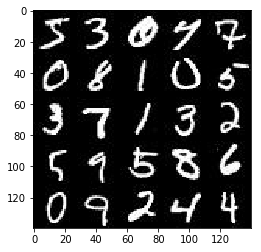

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

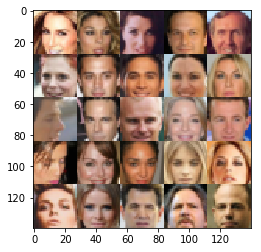

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.1
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    real_input = tf.placeholder(tf.float32,(None,image_height,image_width,image_channels),name='real_input')
    z_input = tf.placeholder(tf.float32,(None,z_dim),name='z_input')
    lr_rate = tf.placeholder(tf.float32,name='lr_rate') 
    
    
    return real_input, z_input, lr_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator',reuse=reuse):
        #input_shape is 28*28*3
        conv1 = tf.layers.conv2d(images,64,5,strides=2,padding='same')
        relu1 = tf.maximum(conv1*0.01,conv1)
        #14*14*64
        conv2 = tf.layers.conv2d(relu1,128,5,strides=2,padding='same')
        bn2 = tf.layers.batch_normalization(conv2,training=True)
        relu2 = tf.maximum(bn2*0.01,conv2)
        #7*7*128
        conv3 = tf.layers.conv2d(relu2,256,3,strides=1,padding='same')
        bn3 = tf.layers.batch_normalization(conv3,training=True)
        relu3 = tf.maximum(bn3*0.01,conv3)
        #7*7*256
        flatten = tf.reshape(relu3,(-1,7*7*256))
        logits = tf.layers.dense(flatten,1)
        output = tf.sigmoid(logits)
        
    return output, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator',reuse=not is_train):
        x1 = tf.layers.dense(z,7*7*512)
        x1 = tf.reshape(x1,(-1,7,7,512))
        x1 = tf.layers.batch_normalization(x1,training=is_train)
        x1 = tf.maximum(x1*0.01,x1)
        
        x2 = tf.layers.conv2d_transpose(x1,256,3,strides=1,padding='same')
        x2 = tf.layers.batch_normalization(x2,training=is_train)
        x2 = tf.maximum(x2*0.01,x2)
        
        x3 = tf.layers.conv2d_transpose(x2,128,5,strides=2,padding='same')
        x3 = tf.layers.batch_normalization(x3,training=is_train)
        x3 = tf.maximum(x3*0.01,x3)
        
        logits = tf.layers.conv2d_transpose(x3,out_channel_dim,5,strides=2,padding='same')

        output = tf.tanh(logits)
        
        
    return output


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z,out_channel_dim)
    d_model_real,d_logits_real = discriminator(input_real)
    d_model_fake,d_logits_fake = discriminator(g_model,reuse=True)
    
    d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.ones_like(d_logits_real),logits=d_logits_real))
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.zeros_like(d_logits_fake),logits=d_logits_fake))
    d_loss = d_loss_real + d_loss_fake
    
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.ones_like(d_logits_fake),logits=d_logits_fake))
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [34]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
  
    d_train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate,beta1=beta1).minimize(d_loss,var_list=d_vars)
    g_train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate,beta1=beta1).minimize(g_loss,var_list=g_vars)
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [35]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [38]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    real_input,z_input,lr_rate = model_inputs(data_shape[1],data_shape[2],data_shape[3],z_dim)
    d_loss,g_loss = model_loss(real_input,z_input,data_shape[-1])
    d_opt,g_opt = model_opt(d_loss,g_loss,learning_rate,beta1)
    


    samples, losses = [], []
    steps = 0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                steps += 1
                # TODO: Train Mode
#                 print(batch_images.shape)
                batch_z = np.random.uniform(-1,1,size=(batch_size,z_dim))
#                 print('images:',batch_images)
#                 print('\nbatch_z: ',batch_z)
#                 print('\nlearning_rate: ',learning_rate)
                _ = sess.run(d_opt,{z_input:batch_z,lr_rate:learning_rate,real_input:batch_images})
                _ = sess.run(g_opt,{z_input:batch_z,lr_rate:learning_rate})
        
                if steps % 20 == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({z_input: batch_z, real_input: batch_images})
                    train_loss_g = g_loss.eval({z_input: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    # Save losses to view after training
                    losses.append((train_loss_d, train_loss_g))

                if steps % 20 == 0:
                    show_generator_output(sess,4,z_input,data_shape[-1],data_image_mode)

                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.9915... Generator Loss: 0.9045


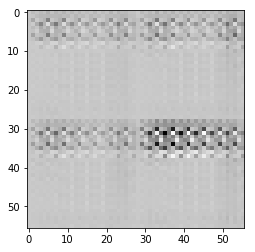

Epoch 1/2... Discriminator Loss: 1.1331... Generator Loss: 0.9860


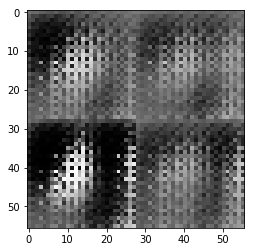

Epoch 1/2... Discriminator Loss: 1.3094... Generator Loss: 0.6579


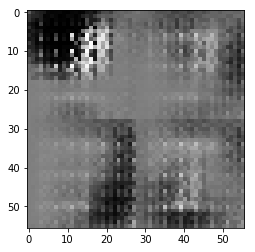

Epoch 1/2... Discriminator Loss: 0.8735... Generator Loss: 1.5657


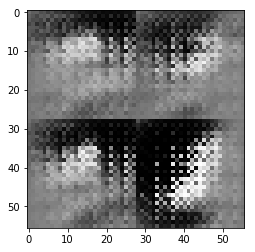

Epoch 1/2... Discriminator Loss: 0.7387... Generator Loss: 1.4923


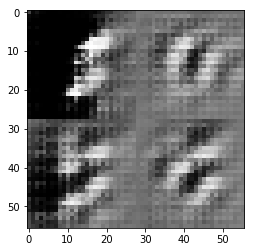

Epoch 1/2... Discriminator Loss: 0.4704... Generator Loss: 1.7932


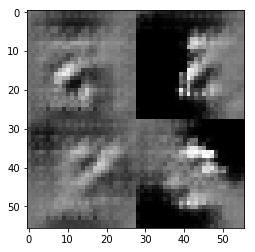

Epoch 1/2... Discriminator Loss: 0.9955... Generator Loss: 2.5074


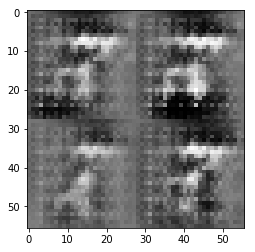

Epoch 1/2... Discriminator Loss: 0.2658... Generator Loss: 3.2888


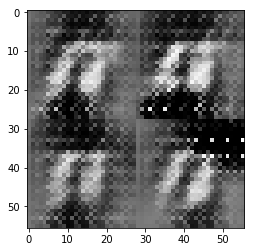

Epoch 1/2... Discriminator Loss: 9.7743... Generator Loss: 2.4560


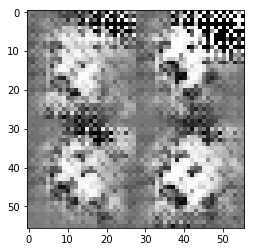

Epoch 1/2... Discriminator Loss: 0.4549... Generator Loss: 1.9148


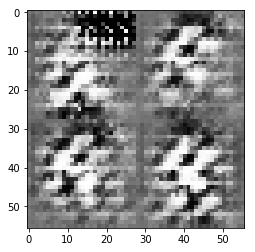

Epoch 1/2... Discriminator Loss: 1.2826... Generator Loss: 0.5679


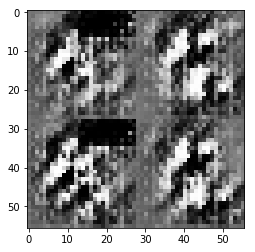

Epoch 1/2... Discriminator Loss: 0.6880... Generator Loss: 1.4059


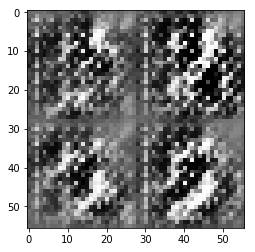

Epoch 1/2... Discriminator Loss: 0.7966... Generator Loss: 0.7666


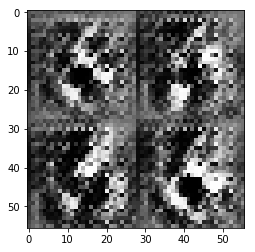

Epoch 1/2... Discriminator Loss: 1.3351... Generator Loss: 0.5386


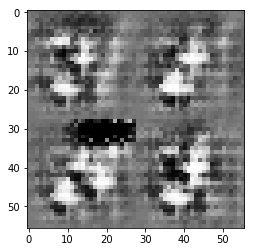

Epoch 1/2... Discriminator Loss: 0.6869... Generator Loss: 1.3120


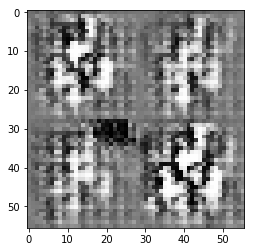

Epoch 1/2... Discriminator Loss: 0.7376... Generator Loss: 1.6930


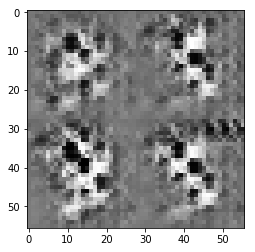

Epoch 1/2... Discriminator Loss: 0.5512... Generator Loss: 2.0910


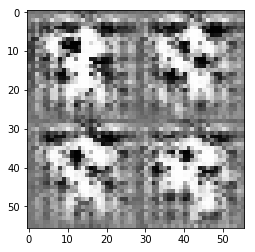

Epoch 1/2... Discriminator Loss: 0.2940... Generator Loss: 3.1206


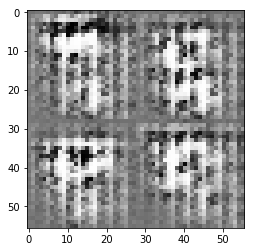

Epoch 1/2... Discriminator Loss: 0.4485... Generator Loss: 1.5813


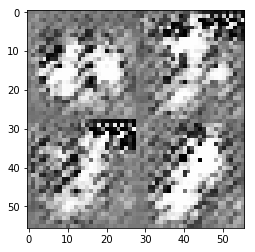

Epoch 1/2... Discriminator Loss: 1.2808... Generator Loss: 1.6715


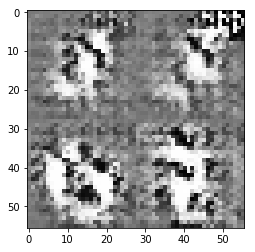

Epoch 1/2... Discriminator Loss: 0.5374... Generator Loss: 1.3118


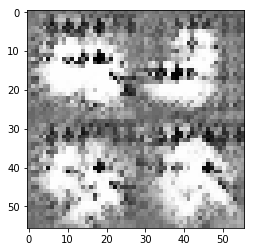

Epoch 1/2... Discriminator Loss: 0.4782... Generator Loss: 3.8994


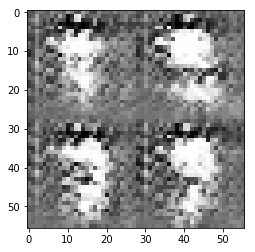

Epoch 1/2... Discriminator Loss: 0.6358... Generator Loss: 1.4640


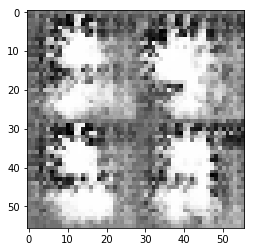

Epoch 1/2... Discriminator Loss: 0.2413... Generator Loss: 3.2740


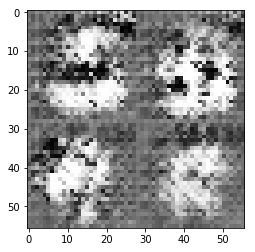

Epoch 1/2... Discriminator Loss: 0.7101... Generator Loss: 1.2010


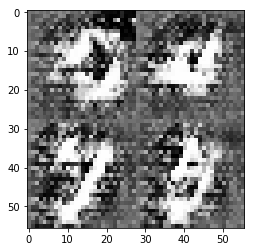

Epoch 1/2... Discriminator Loss: 0.3309... Generator Loss: 2.2365


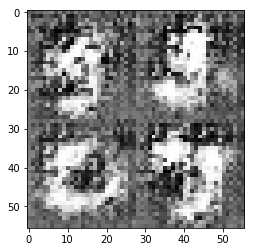

Epoch 1/2... Discriminator Loss: 0.1424... Generator Loss: 4.6729


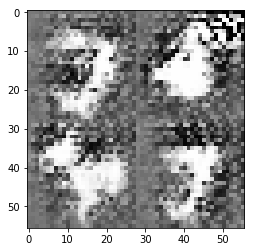

Epoch 1/2... Discriminator Loss: 0.3533... Generator Loss: 2.0599


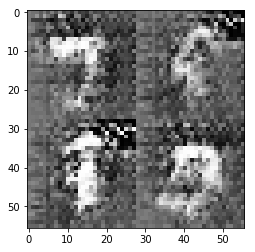

Epoch 1/2... Discriminator Loss: 0.4262... Generator Loss: 2.3770


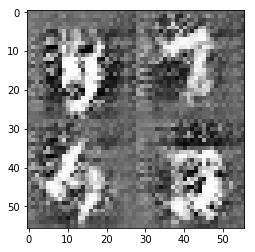

Epoch 1/2... Discriminator Loss: 1.0287... Generator Loss: 0.6085


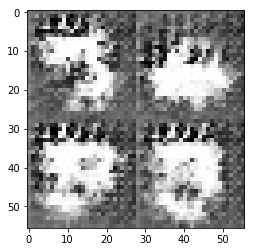

Epoch 1/2... Discriminator Loss: 0.5972... Generator Loss: 3.8044


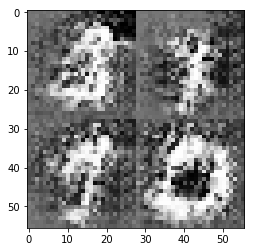

Epoch 1/2... Discriminator Loss: 1.0870... Generator Loss: 1.0825


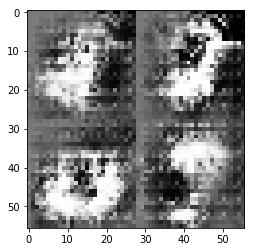

Epoch 1/2... Discriminator Loss: 0.6965... Generator Loss: 1.6754


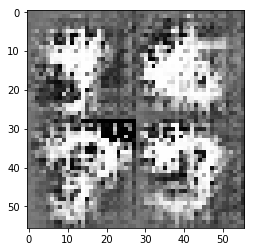

Epoch 1/2... Discriminator Loss: 0.5683... Generator Loss: 1.1789


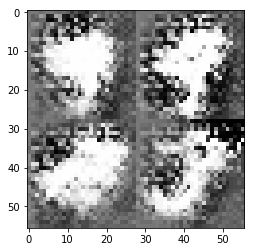

Epoch 1/2... Discriminator Loss: 0.5845... Generator Loss: 1.1017


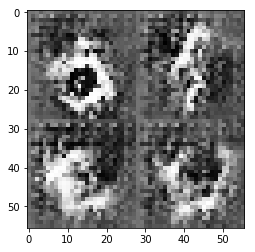

Epoch 1/2... Discriminator Loss: 1.0767... Generator Loss: 0.7397


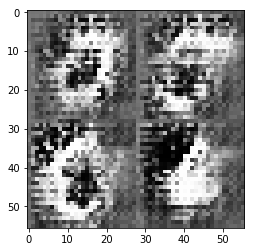

Epoch 1/2... Discriminator Loss: 0.7105... Generator Loss: 1.3601


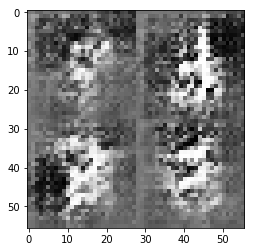

Epoch 1/2... Discriminator Loss: 0.5247... Generator Loss: 1.5929


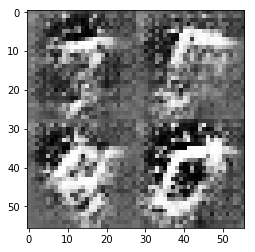

Epoch 1/2... Discriminator Loss: 0.3676... Generator Loss: 2.0714


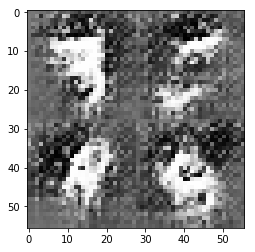

Epoch 1/2... Discriminator Loss: 1.0000... Generator Loss: 0.6405


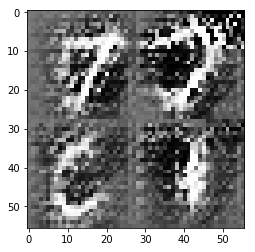

Epoch 1/2... Discriminator Loss: 0.1730... Generator Loss: 4.9675


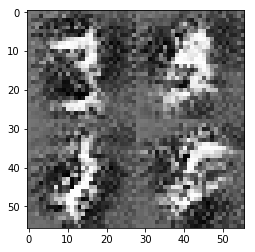

Epoch 1/2... Discriminator Loss: 0.7879... Generator Loss: 1.1837


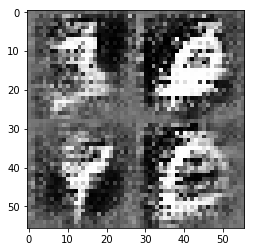

Epoch 1/2... Discriminator Loss: 0.5139... Generator Loss: 1.3868


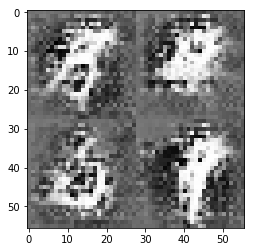

Epoch 1/2... Discriminator Loss: 0.8288... Generator Loss: 0.7799


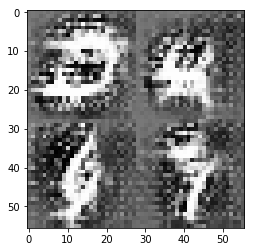

Epoch 1/2... Discriminator Loss: 0.9382... Generator Loss: 5.1550


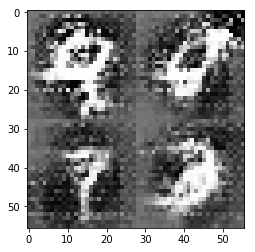

Epoch 1/2... Discriminator Loss: 0.2737... Generator Loss: 2.4479


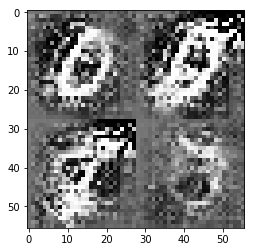

Epoch 1/2... Discriminator Loss: 0.2726... Generator Loss: 2.4310


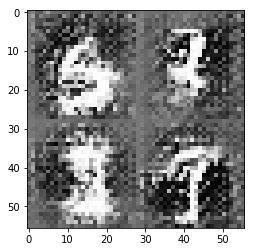

Epoch 1/2... Discriminator Loss: 0.9013... Generator Loss: 1.0020


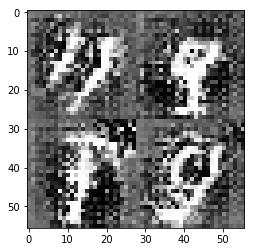

Epoch 1/2... Discriminator Loss: 0.9209... Generator Loss: 4.9255


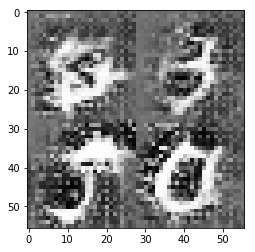

Epoch 1/2... Discriminator Loss: 0.3955... Generator Loss: 1.6128


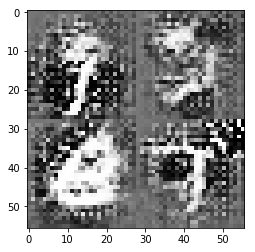

Epoch 1/2... Discriminator Loss: 3.1462... Generator Loss: 2.0627


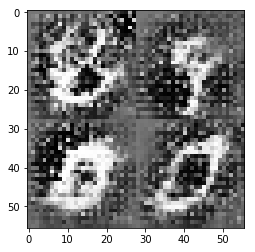

Epoch 1/2... Discriminator Loss: 0.8107... Generator Loss: 1.1220


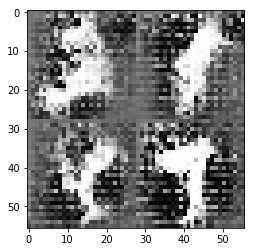

Epoch 1/2... Discriminator Loss: 0.7291... Generator Loss: 2.2043


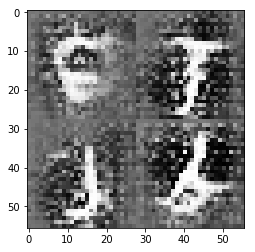

Epoch 1/2... Discriminator Loss: 0.6952... Generator Loss: 1.2260


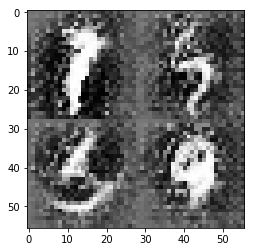

Epoch 1/2... Discriminator Loss: 0.4942... Generator Loss: 3.8248


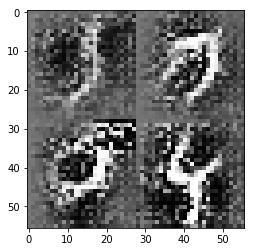

Epoch 1/2... Discriminator Loss: 0.5502... Generator Loss: 1.1735


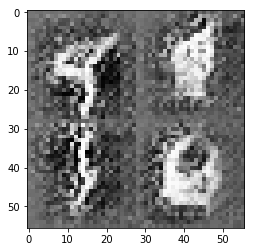

Epoch 1/2... Discriminator Loss: 0.3000... Generator Loss: 4.0515


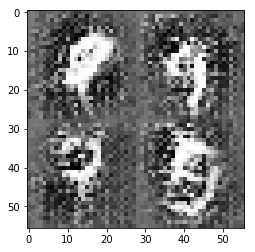

Epoch 1/2... Discriminator Loss: 0.3449... Generator Loss: 3.7334


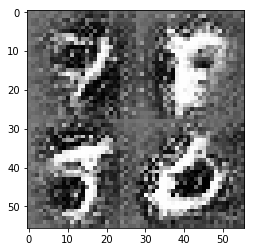

Epoch 1/2... Discriminator Loss: 2.0731... Generator Loss: 0.6800


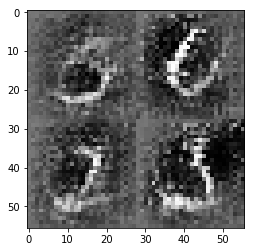

Epoch 1/2... Discriminator Loss: 0.7237... Generator Loss: 1.1620


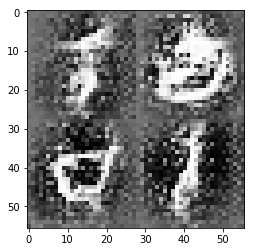

Epoch 1/2... Discriminator Loss: 0.6288... Generator Loss: 1.7244


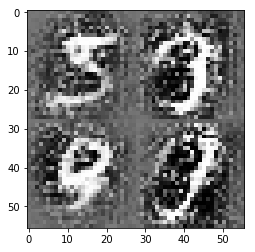

Epoch 1/2... Discriminator Loss: 1.4441... Generator Loss: 0.3487


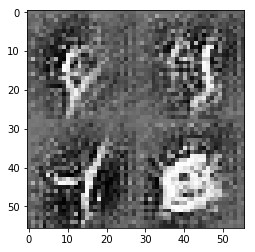

Epoch 1/2... Discriminator Loss: 0.6965... Generator Loss: 5.0429


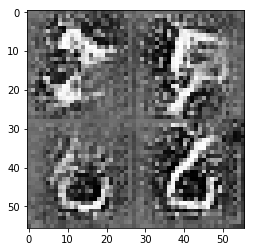

Epoch 1/2... Discriminator Loss: 0.4754... Generator Loss: 1.5076


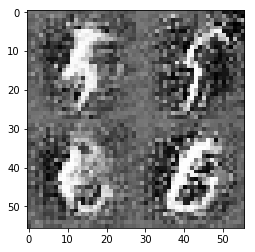

Epoch 1/2... Discriminator Loss: 2.3868... Generator Loss: 0.1481


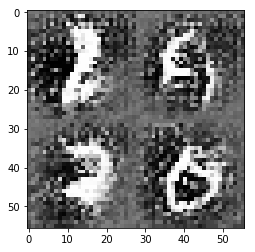

Epoch 1/2... Discriminator Loss: 0.9608... Generator Loss: 0.6579


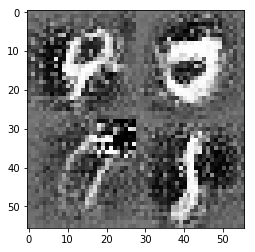

Epoch 1/2... Discriminator Loss: 0.1266... Generator Loss: 4.4591


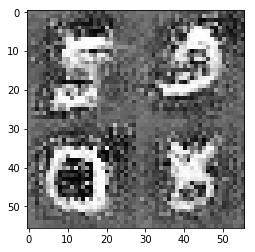

Epoch 1/2... Discriminator Loss: 1.1471... Generator Loss: 0.7433


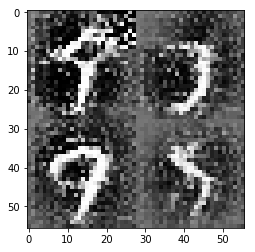

Epoch 1/2... Discriminator Loss: 0.5180... Generator Loss: 1.7207


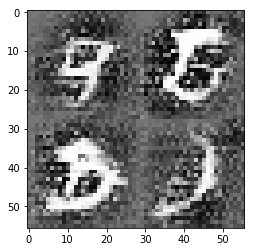

Epoch 1/2... Discriminator Loss: 0.4852... Generator Loss: 1.4733


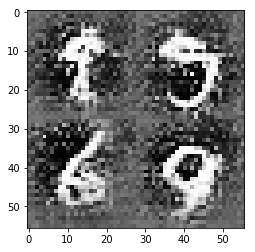

Epoch 1/2... Discriminator Loss: 0.6669... Generator Loss: 1.4168


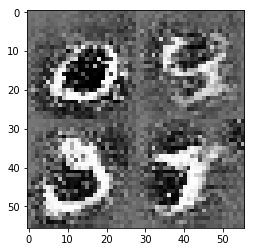

Epoch 1/2... Discriminator Loss: 1.0389... Generator Loss: 1.0375


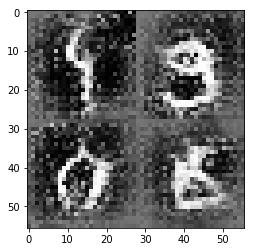

Epoch 1/2... Discriminator Loss: 0.7532... Generator Loss: 1.4329


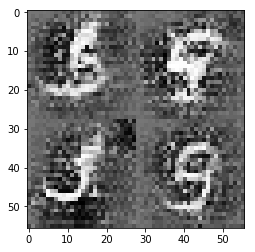

Epoch 1/2... Discriminator Loss: 0.7058... Generator Loss: 1.0322


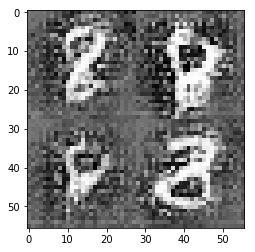

Epoch 1/2... Discriminator Loss: 0.3950... Generator Loss: 1.5984


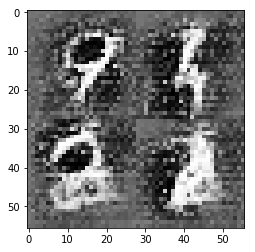

Epoch 1/2... Discriminator Loss: 0.9528... Generator Loss: 0.6964


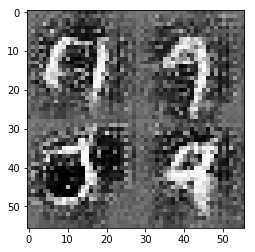

Epoch 1/2... Discriminator Loss: 0.6311... Generator Loss: 1.3506


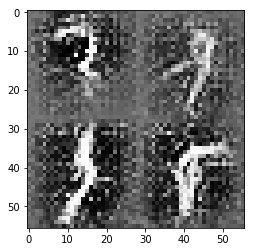

Epoch 1/2... Discriminator Loss: 0.1151... Generator Loss: 3.9274


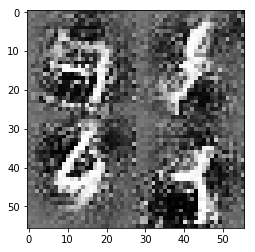

Epoch 1/2... Discriminator Loss: 1.4402... Generator Loss: 0.5950


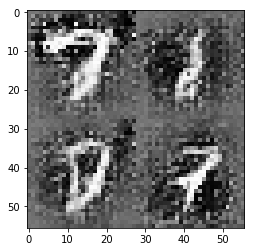

Epoch 1/2... Discriminator Loss: 1.0915... Generator Loss: 0.5519


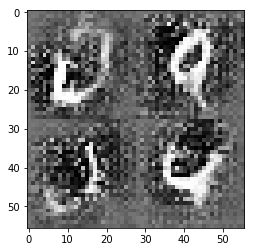

Epoch 1/2... Discriminator Loss: 0.3415... Generator Loss: 2.3581


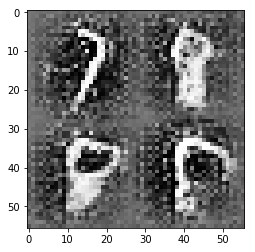

Epoch 1/2... Discriminator Loss: 0.9198... Generator Loss: 2.5261


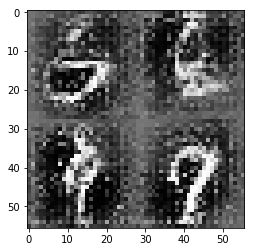

Epoch 1/2... Discriminator Loss: 0.7212... Generator Loss: 0.9931


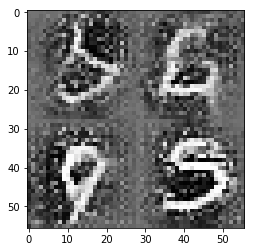

Epoch 1/2... Discriminator Loss: 0.6111... Generator Loss: 1.6389


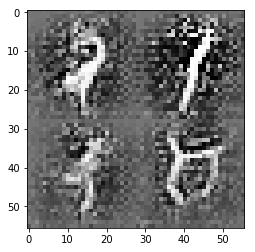

Epoch 1/2... Discriminator Loss: 1.4144... Generator Loss: 0.3815


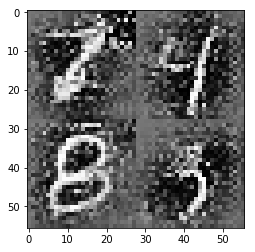

Epoch 1/2... Discriminator Loss: 1.7489... Generator Loss: 0.3482


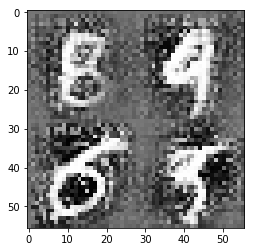

Epoch 1/2... Discriminator Loss: 0.3288... Generator Loss: 3.1826


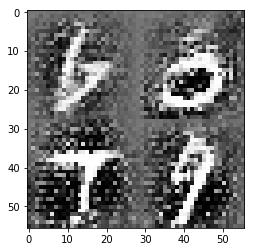

Epoch 1/2... Discriminator Loss: 0.1843... Generator Loss: 2.2586


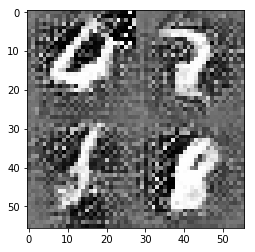

Epoch 1/2... Discriminator Loss: 0.1042... Generator Loss: 3.4225


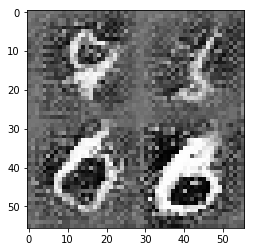

Epoch 1/2... Discriminator Loss: 0.0822... Generator Loss: 4.1862


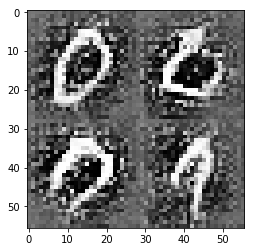

Epoch 1/2... Discriminator Loss: 0.4307... Generator Loss: 1.7301


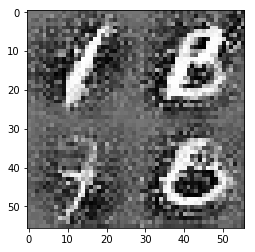

Epoch 1/2... Discriminator Loss: 2.3364... Generator Loss: 0.2691


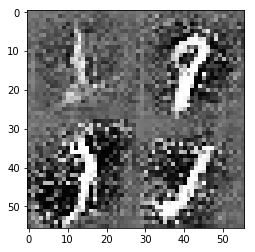

Epoch 1/2... Discriminator Loss: 1.7307... Generator Loss: 0.3567


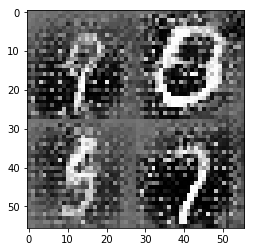

Epoch 2/2... Discriminator Loss: 0.6366... Generator Loss: 1.2881


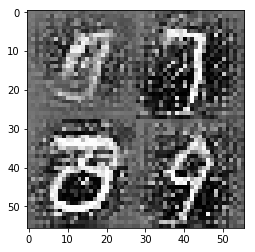

Epoch 2/2... Discriminator Loss: 0.6479... Generator Loss: 1.6791


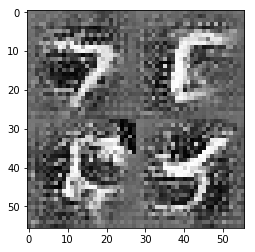

Epoch 2/2... Discriminator Loss: 0.5079... Generator Loss: 1.6073


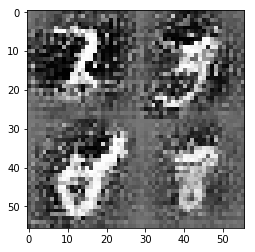

Epoch 2/2... Discriminator Loss: 0.7285... Generator Loss: 1.3783


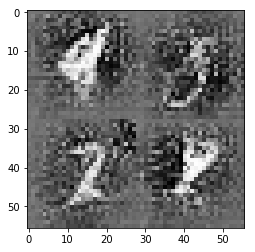

Epoch 2/2... Discriminator Loss: 0.7455... Generator Loss: 1.7205


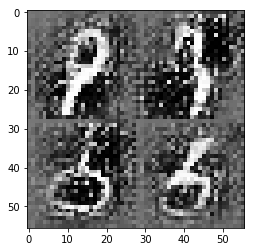

Epoch 2/2... Discriminator Loss: 0.9788... Generator Loss: 0.7458


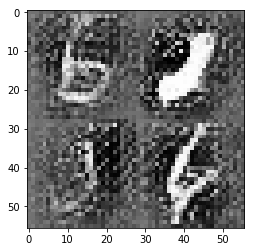

Epoch 2/2... Discriminator Loss: 0.3491... Generator Loss: 2.2219


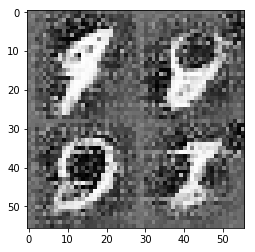

Epoch 2/2... Discriminator Loss: 0.4694... Generator Loss: 1.3379


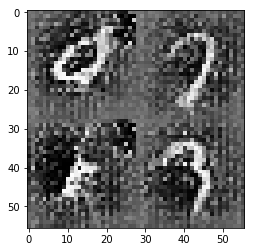

Epoch 2/2... Discriminator Loss: 0.5318... Generator Loss: 1.3042


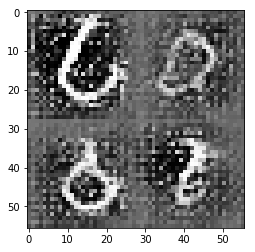

Epoch 2/2... Discriminator Loss: 0.9087... Generator Loss: 0.9535


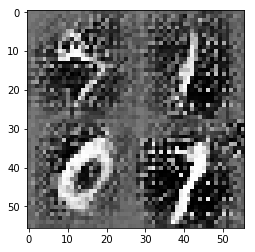

Epoch 2/2... Discriminator Loss: 1.2834... Generator Loss: 0.5673


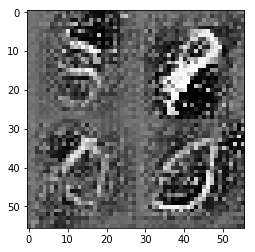

Epoch 2/2... Discriminator Loss: 0.5581... Generator Loss: 2.1803


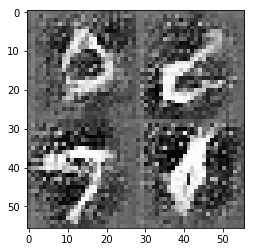

Epoch 2/2... Discriminator Loss: 0.8085... Generator Loss: 0.8907


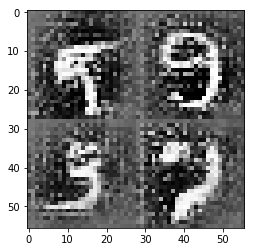

Epoch 2/2... Discriminator Loss: 0.4410... Generator Loss: 1.9616


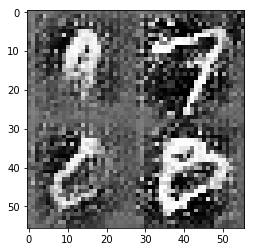

Epoch 2/2... Discriminator Loss: 1.2955... Generator Loss: 0.5187


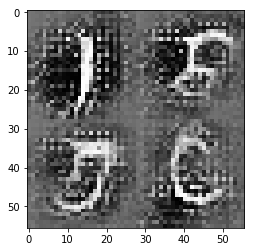

Epoch 2/2... Discriminator Loss: 1.2012... Generator Loss: 0.5867


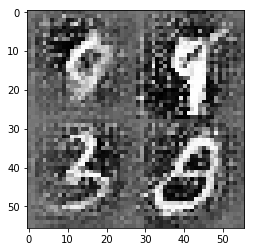

Epoch 2/2... Discriminator Loss: 0.1585... Generator Loss: 2.6412


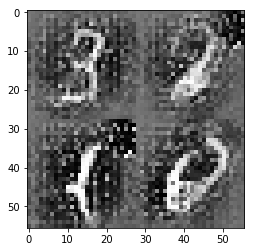

Epoch 2/2... Discriminator Loss: 0.0542... Generator Loss: 4.8594


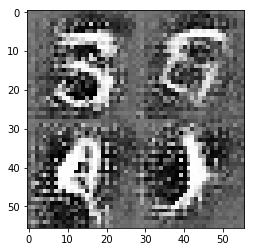

Epoch 2/2... Discriminator Loss: 2.2190... Generator Loss: 0.2071


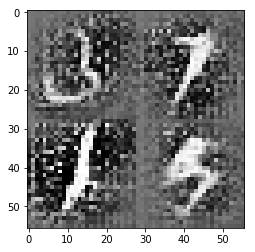

Epoch 2/2... Discriminator Loss: 0.9589... Generator Loss: 0.8140


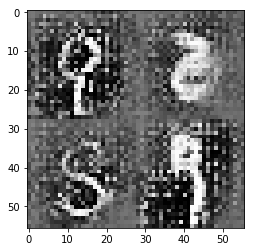

Epoch 2/2... Discriminator Loss: 0.2631... Generator Loss: 3.3766


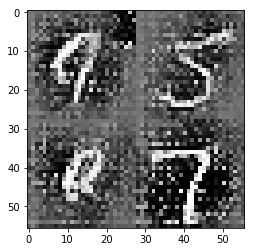

Epoch 2/2... Discriminator Loss: 0.1797... Generator Loss: 2.6538


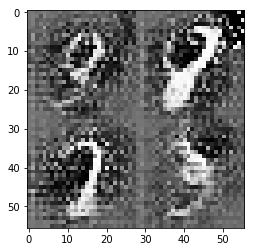

Epoch 2/2... Discriminator Loss: 0.5746... Generator Loss: 1.6373


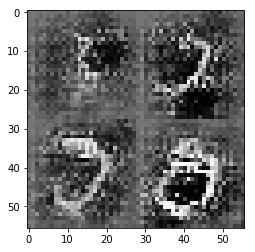

Epoch 2/2... Discriminator Loss: 0.6434... Generator Loss: 1.4041


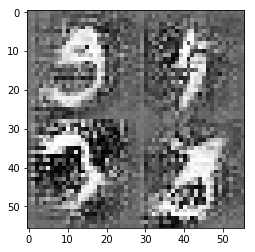

Epoch 2/2... Discriminator Loss: 0.7545... Generator Loss: 0.9833


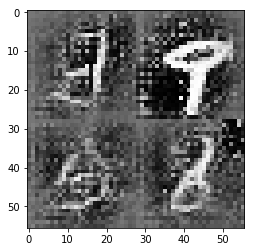

Epoch 2/2... Discriminator Loss: 0.7370... Generator Loss: 1.0333


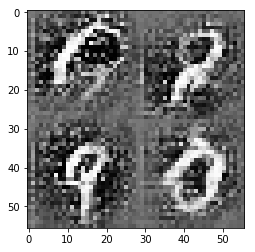

Epoch 2/2... Discriminator Loss: 0.7270... Generator Loss: 1.1756


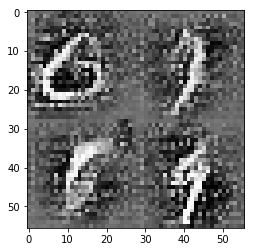

Epoch 2/2... Discriminator Loss: 0.7380... Generator Loss: 1.6367


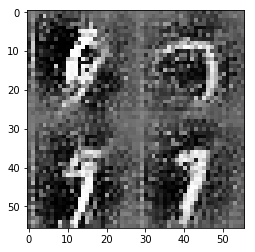

Epoch 2/2... Discriminator Loss: 0.8440... Generator Loss: 1.8391


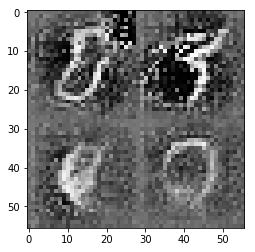

Epoch 2/2... Discriminator Loss: 0.8513... Generator Loss: 0.8838


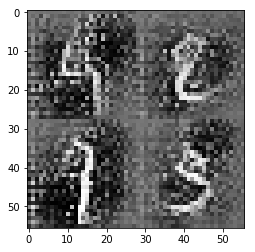

Epoch 2/2... Discriminator Loss: 0.6115... Generator Loss: 1.8802


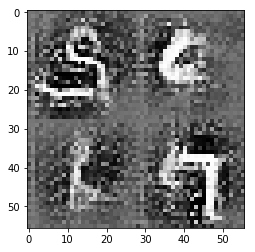

Epoch 2/2... Discriminator Loss: 1.0389... Generator Loss: 0.8479


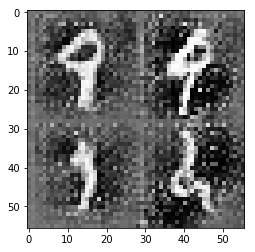

Epoch 2/2... Discriminator Loss: 0.8896... Generator Loss: 2.7914


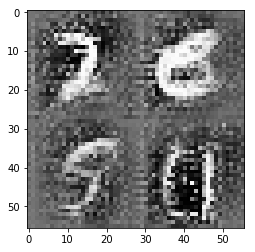

Epoch 2/2... Discriminator Loss: 0.3750... Generator Loss: 1.7420


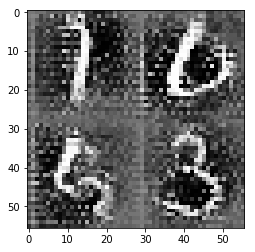

Epoch 2/2... Discriminator Loss: 0.9228... Generator Loss: 0.9701


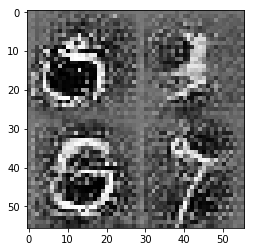

Epoch 2/2... Discriminator Loss: 1.3609... Generator Loss: 0.5246


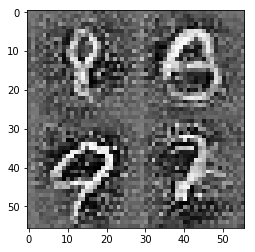

Epoch 2/2... Discriminator Loss: 0.5535... Generator Loss: 1.2431


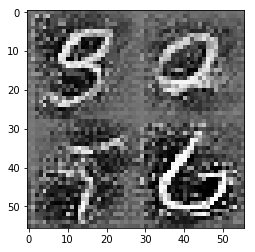

Epoch 2/2... Discriminator Loss: 0.0559... Generator Loss: 4.4247


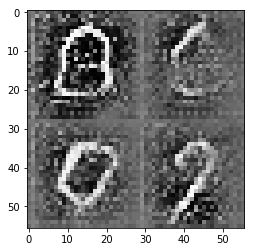

Epoch 2/2... Discriminator Loss: 0.4597... Generator Loss: 1.9997


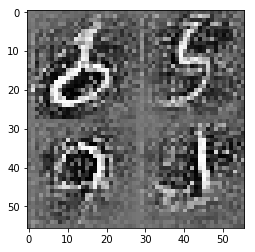

Epoch 2/2... Discriminator Loss: 0.6397... Generator Loss: 1.7656


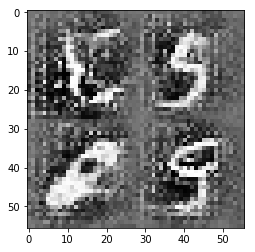

Epoch 2/2... Discriminator Loss: 0.5840... Generator Loss: 2.3186


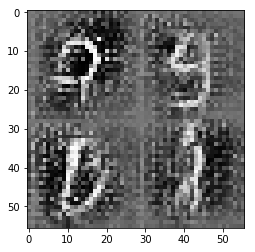

Epoch 2/2... Discriminator Loss: 0.7689... Generator Loss: 1.2147


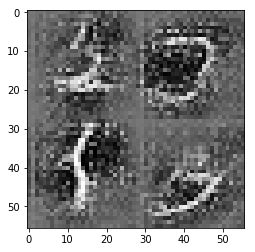

Epoch 2/2... Discriminator Loss: 1.0625... Generator Loss: 0.8831


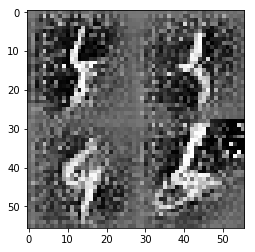

Epoch 2/2... Discriminator Loss: 0.5619... Generator Loss: 1.3068


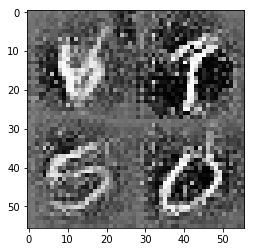

Epoch 2/2... Discriminator Loss: 0.8267... Generator Loss: 0.9991


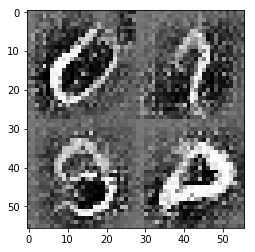

Epoch 2/2... Discriminator Loss: 0.5869... Generator Loss: 2.9453


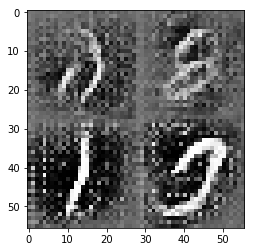

Epoch 2/2... Discriminator Loss: 0.2602... Generator Loss: 2.5543


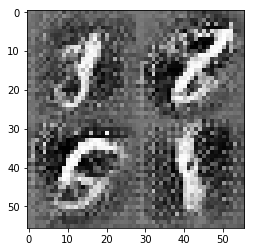

Epoch 2/2... Discriminator Loss: 0.5265... Generator Loss: 1.4627


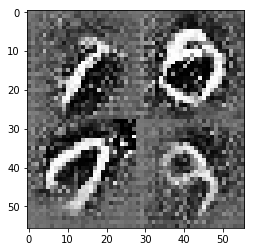

Epoch 2/2... Discriminator Loss: 0.6169... Generator Loss: 1.4961


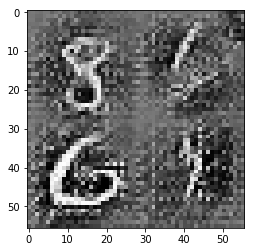

Epoch 2/2... Discriminator Loss: 0.9143... Generator Loss: 0.8298


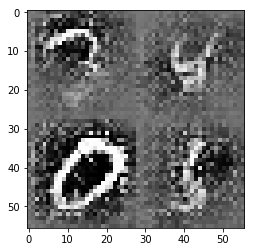

Epoch 2/2... Discriminator Loss: 0.2972... Generator Loss: 2.2057


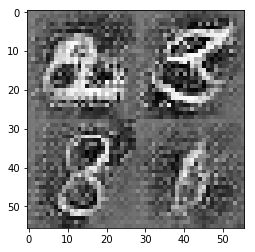

Epoch 2/2... Discriminator Loss: 0.1881... Generator Loss: 2.8200


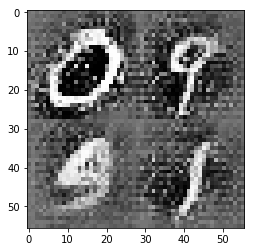

Epoch 2/2... Discriminator Loss: 2.3812... Generator Loss: 0.1397


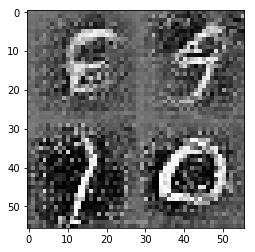

Epoch 2/2... Discriminator Loss: 0.8156... Generator Loss: 3.5789


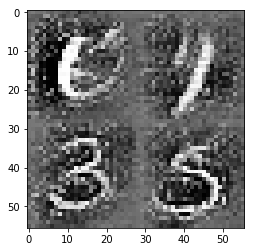

Epoch 2/2... Discriminator Loss: 0.7182... Generator Loss: 1.2183


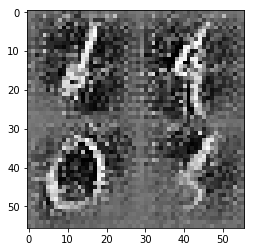

Epoch 2/2... Discriminator Loss: 0.4208... Generator Loss: 1.9680


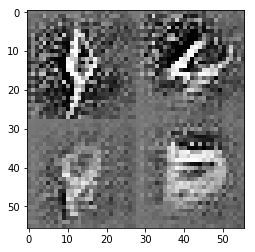

Epoch 2/2... Discriminator Loss: 0.7750... Generator Loss: 1.0046


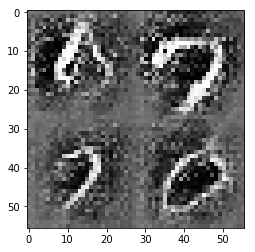

Epoch 2/2... Discriminator Loss: 0.5882... Generator Loss: 1.4471


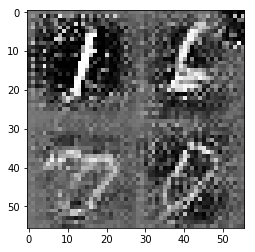

Epoch 2/2... Discriminator Loss: 0.9320... Generator Loss: 0.8129


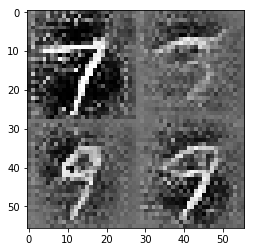

Epoch 2/2... Discriminator Loss: 0.5298... Generator Loss: 1.5508


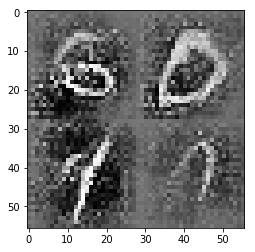

Epoch 2/2... Discriminator Loss: 0.3189... Generator Loss: 1.8513


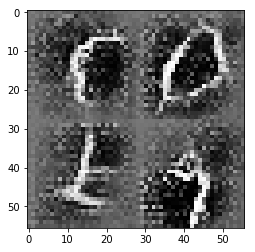

Epoch 2/2... Discriminator Loss: 0.8593... Generator Loss: 0.9890


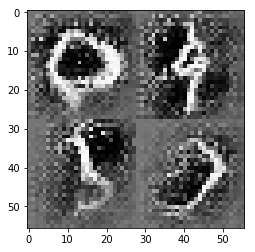

Epoch 2/2... Discriminator Loss: 0.6326... Generator Loss: 1.8046


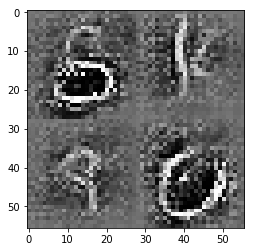

Epoch 2/2... Discriminator Loss: 0.8572... Generator Loss: 1.0710


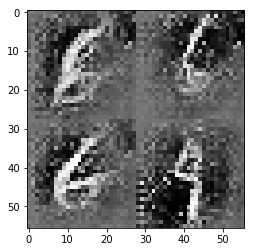

Epoch 2/2... Discriminator Loss: 0.5881... Generator Loss: 1.7560


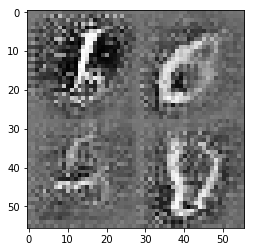

Epoch 2/2... Discriminator Loss: 0.7110... Generator Loss: 1.4719


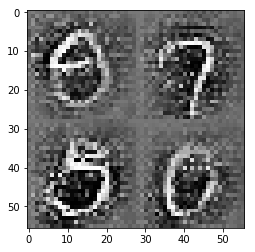

Epoch 2/2... Discriminator Loss: 0.6577... Generator Loss: 1.6215


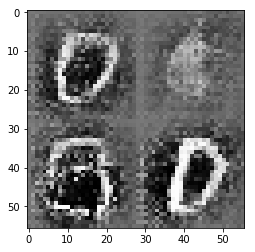

Epoch 2/2... Discriminator Loss: 1.2216... Generator Loss: 3.2972


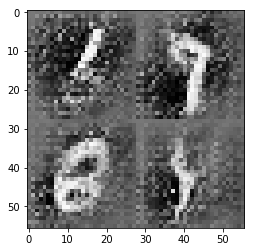

Epoch 2/2... Discriminator Loss: 0.5161... Generator Loss: 1.8246


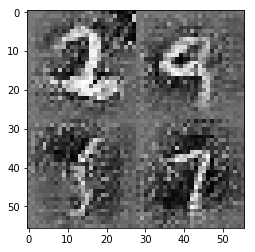

Epoch 2/2... Discriminator Loss: 0.6208... Generator Loss: 2.1467


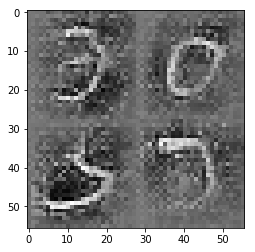

Epoch 2/2... Discriminator Loss: 0.8409... Generator Loss: 1.0959


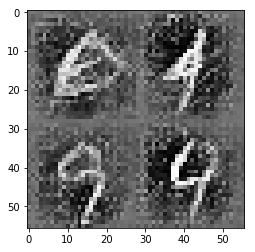

Epoch 2/2... Discriminator Loss: 1.5389... Generator Loss: 0.4378


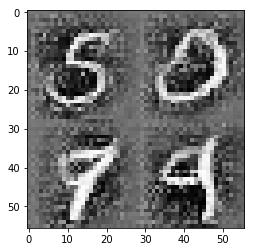

Epoch 2/2... Discriminator Loss: 0.5482... Generator Loss: 1.6895


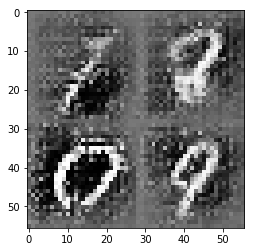

Epoch 2/2... Discriminator Loss: 0.3496... Generator Loss: 2.2156


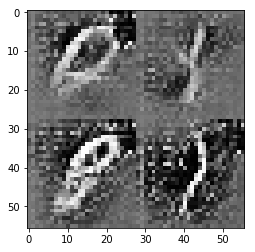

Epoch 2/2... Discriminator Loss: 0.6390... Generator Loss: 1.9269


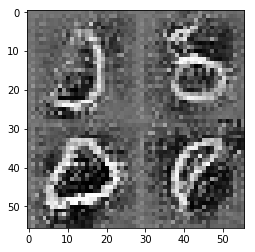

Epoch 2/2... Discriminator Loss: 0.7714... Generator Loss: 1.0020


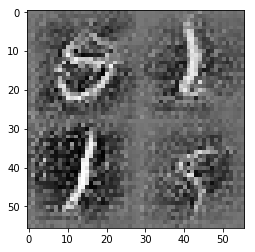

Epoch 2/2... Discriminator Loss: 0.8823... Generator Loss: 0.8799


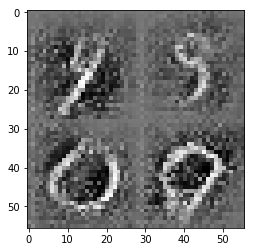

Epoch 2/2... Discriminator Loss: 1.0805... Generator Loss: 0.7035


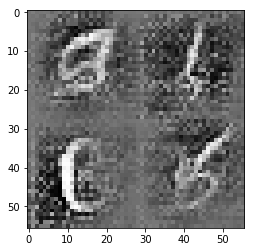

Epoch 2/2... Discriminator Loss: 0.4030... Generator Loss: 1.8742


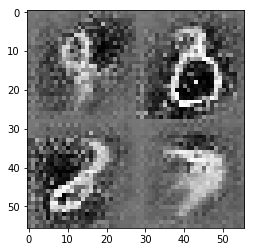

Epoch 2/2... Discriminator Loss: 0.7918... Generator Loss: 1.1062


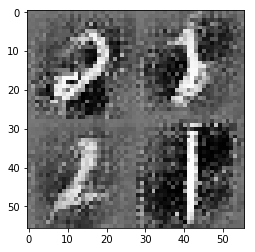

Epoch 2/2... Discriminator Loss: 0.5986... Generator Loss: 1.3125


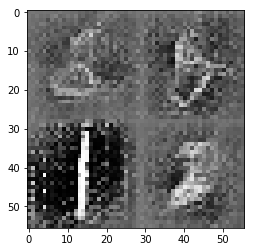

Epoch 2/2... Discriminator Loss: 0.6339... Generator Loss: 1.4242


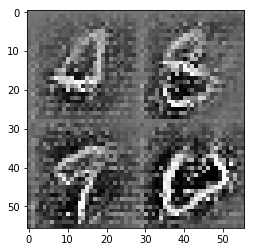

Epoch 2/2... Discriminator Loss: 0.1029... Generator Loss: 4.2723


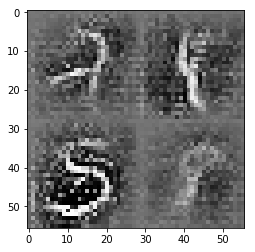

Epoch 2/2... Discriminator Loss: 0.1575... Generator Loss: 3.4735


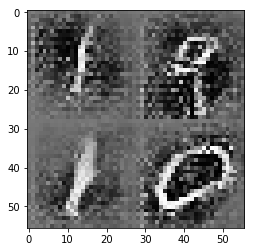

Epoch 2/2... Discriminator Loss: 1.0291... Generator Loss: 2.7925


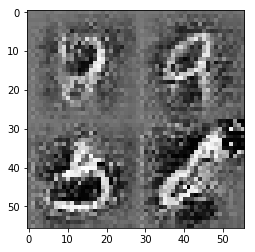

Epoch 2/2... Discriminator Loss: 0.6382... Generator Loss: 1.1454


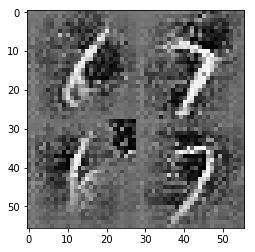

Epoch 2/2... Discriminator Loss: 0.9609... Generator Loss: 0.7149


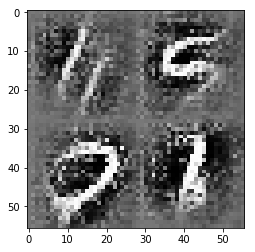

Epoch 2/2... Discriminator Loss: 1.2871... Generator Loss: 0.5976


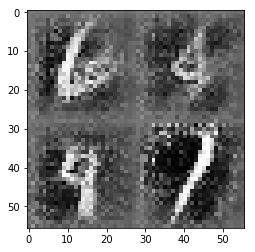

Epoch 2/2... Discriminator Loss: 0.5526... Generator Loss: 1.9402


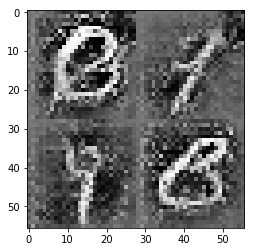

Epoch 2/2... Discriminator Loss: 1.1336... Generator Loss: 0.7060


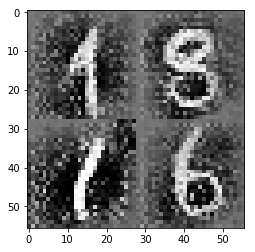

Epoch 2/2... Discriminator Loss: 0.6008... Generator Loss: 1.2087


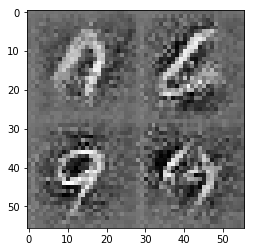

Epoch 2/2... Discriminator Loss: 0.1137... Generator Loss: 3.8085


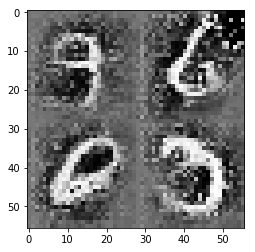

Epoch 2/2... Discriminator Loss: 0.5645... Generator Loss: 1.2383


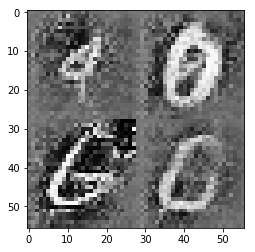

Epoch 2/2... Discriminator Loss: 0.2405... Generator Loss: 2.4007


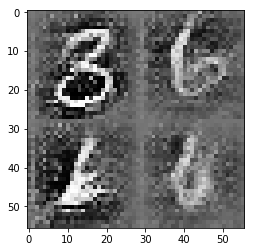

In [39]:
batch_size = 32
z_dim = 100
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 1.1995... Generator Loss: 0.4368


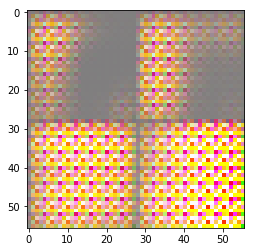

Epoch 1/1... Discriminator Loss: 1.2352... Generator Loss: 1.1892


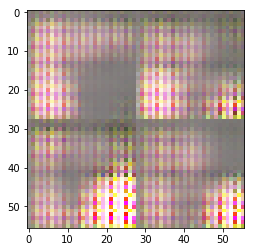

Epoch 1/1... Discriminator Loss: 1.1394... Generator Loss: 0.9626


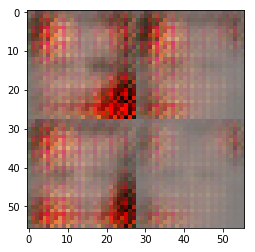

Epoch 1/1... Discriminator Loss: 0.9267... Generator Loss: 1.0147


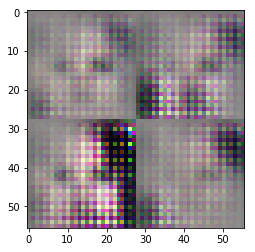

Epoch 1/1... Discriminator Loss: 1.4943... Generator Loss: 2.4542


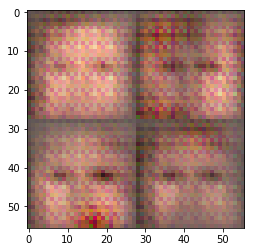

Epoch 1/1... Discriminator Loss: 1.7208... Generator Loss: 0.2472


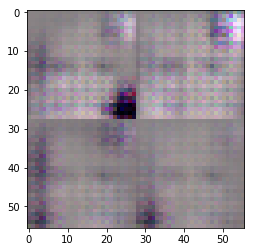

Epoch 1/1... Discriminator Loss: 0.8293... Generator Loss: 1.3567


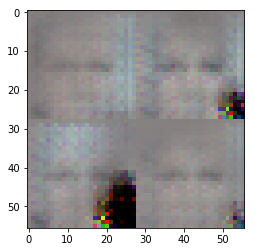

Epoch 1/1... Discriminator Loss: 0.8958... Generator Loss: 1.4454


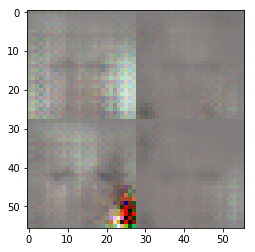

Epoch 1/1... Discriminator Loss: 1.5649... Generator Loss: 1.3389


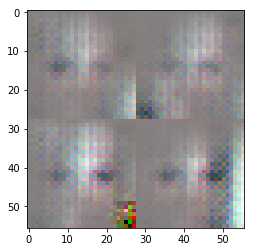

Epoch 1/1... Discriminator Loss: 0.9006... Generator Loss: 1.5787


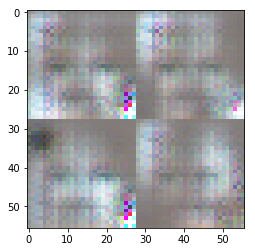

Epoch 1/1... Discriminator Loss: 1.1456... Generator Loss: 1.0143


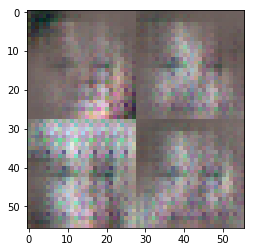

Epoch 1/1... Discriminator Loss: 1.1291... Generator Loss: 0.7500


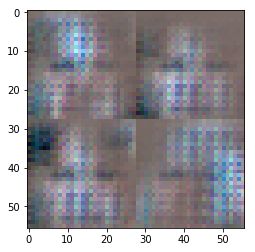

Epoch 1/1... Discriminator Loss: 1.3827... Generator Loss: 0.7364


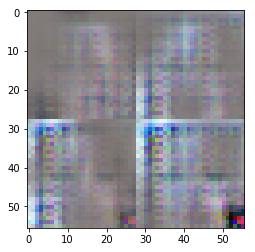

Epoch 1/1... Discriminator Loss: 1.1489... Generator Loss: 0.8348


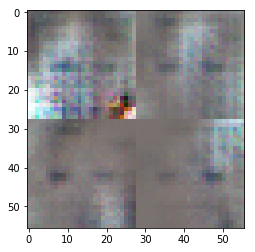

Epoch 1/1... Discriminator Loss: 1.2432... Generator Loss: 0.6756


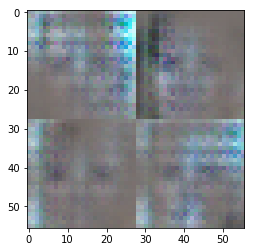

Epoch 1/1... Discriminator Loss: 1.1999... Generator Loss: 0.7836


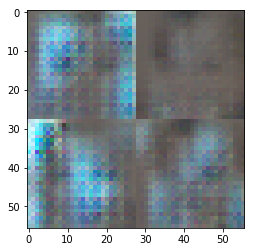

Epoch 1/1... Discriminator Loss: 1.3787... Generator Loss: 1.1844


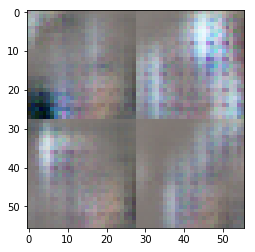

Epoch 1/1... Discriminator Loss: 1.1317... Generator Loss: 0.9619


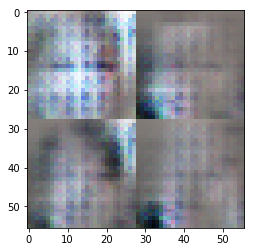

Epoch 1/1... Discriminator Loss: 1.2220... Generator Loss: 0.9673


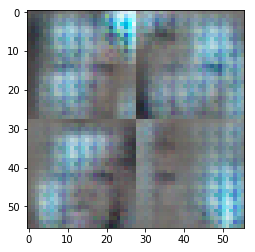

Epoch 1/1... Discriminator Loss: 1.1929... Generator Loss: 0.7082


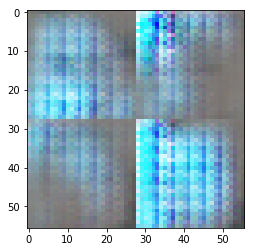

Epoch 1/1... Discriminator Loss: 1.1520... Generator Loss: 0.8186


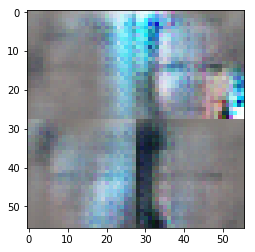

Epoch 1/1... Discriminator Loss: 1.0775... Generator Loss: 0.7757


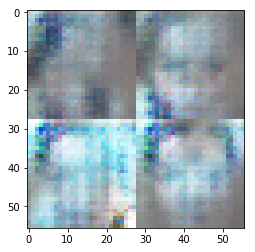

Epoch 1/1... Discriminator Loss: 1.1336... Generator Loss: 0.7704


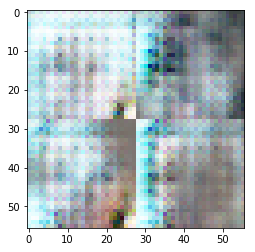

Epoch 1/1... Discriminator Loss: 1.2883... Generator Loss: 0.5261


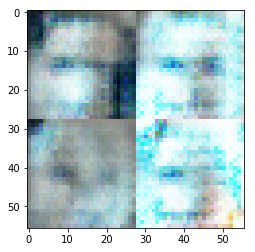

Epoch 1/1... Discriminator Loss: 1.8392... Generator Loss: 0.2804


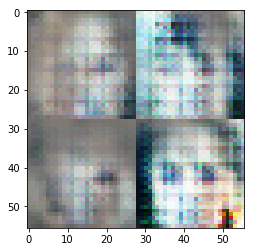

Epoch 1/1... Discriminator Loss: 1.1965... Generator Loss: 0.7120


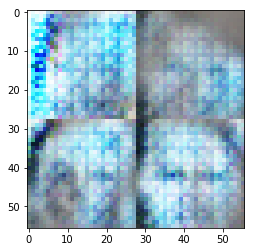

Epoch 1/1... Discriminator Loss: 1.2254... Generator Loss: 0.7466


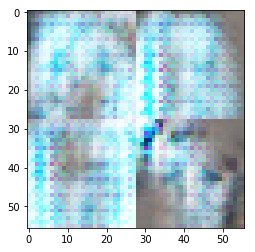

Epoch 1/1... Discriminator Loss: 2.0908... Generator Loss: 0.1782


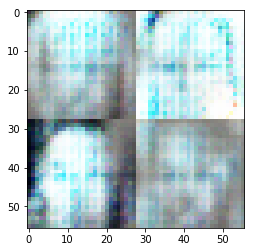

Epoch 1/1... Discriminator Loss: 1.5807... Generator Loss: 1.3487


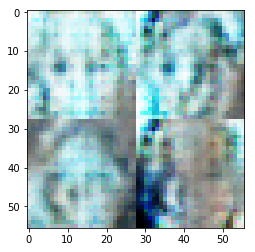

Epoch 1/1... Discriminator Loss: 1.1908... Generator Loss: 1.0421


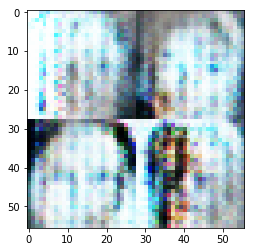

Epoch 1/1... Discriminator Loss: 1.5299... Generator Loss: 0.5012


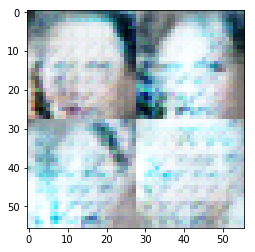

Epoch 1/1... Discriminator Loss: 1.3384... Generator Loss: 0.8306


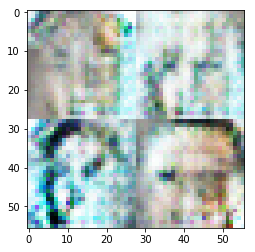

Epoch 1/1... Discriminator Loss: 0.9086... Generator Loss: 1.0746


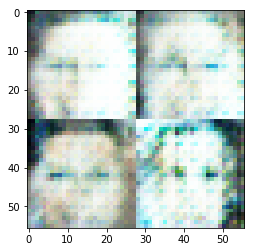

Epoch 1/1... Discriminator Loss: 1.0256... Generator Loss: 1.1514


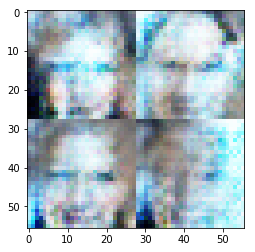

Epoch 1/1... Discriminator Loss: 1.4109... Generator Loss: 0.6321


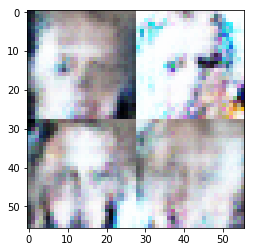

Epoch 1/1... Discriminator Loss: 1.0254... Generator Loss: 1.0535


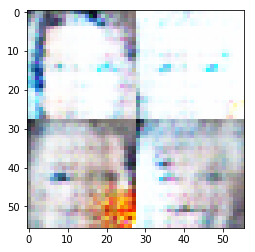

Epoch 1/1... Discriminator Loss: 1.1539... Generator Loss: 0.7794


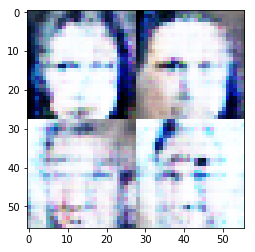

Epoch 1/1... Discriminator Loss: 1.2960... Generator Loss: 0.7432


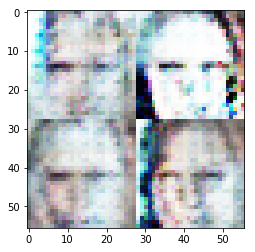

Epoch 1/1... Discriminator Loss: 1.4293... Generator Loss: 0.9098


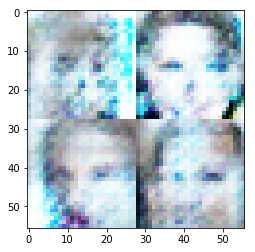

Epoch 1/1... Discriminator Loss: 1.3817... Generator Loss: 0.6998


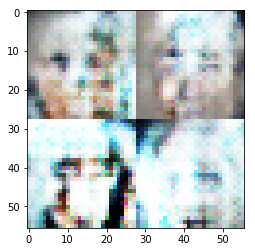

Epoch 1/1... Discriminator Loss: 1.4986... Generator Loss: 1.4095


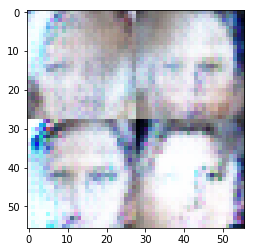

Epoch 1/1... Discriminator Loss: 1.2222... Generator Loss: 0.8830


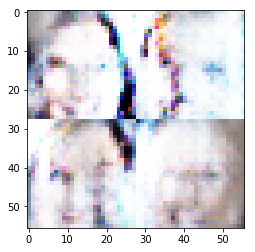

Epoch 1/1... Discriminator Loss: 1.2997... Generator Loss: 0.5895


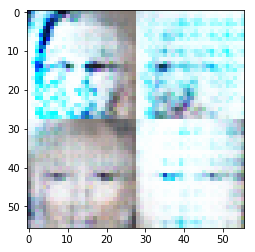

Epoch 1/1... Discriminator Loss: 1.1151... Generator Loss: 0.9104


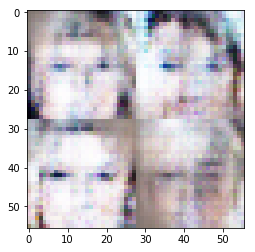

Epoch 1/1... Discriminator Loss: 1.2167... Generator Loss: 0.6626


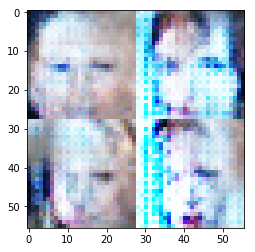

Epoch 1/1... Discriminator Loss: 1.0413... Generator Loss: 1.0066


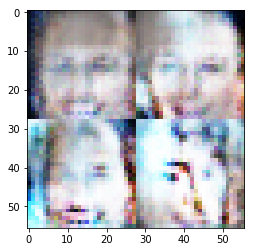

Epoch 1/1... Discriminator Loss: 1.1703... Generator Loss: 0.7123


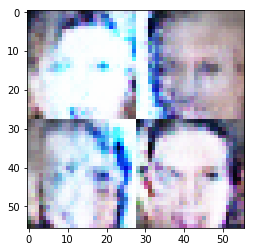

Epoch 1/1... Discriminator Loss: 1.2365... Generator Loss: 0.6732


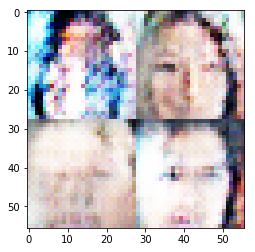

Epoch 1/1... Discriminator Loss: 1.5485... Generator Loss: 0.3726


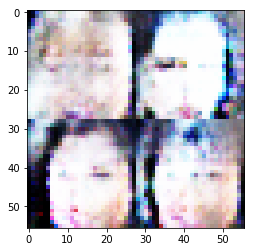

Epoch 1/1... Discriminator Loss: 1.2151... Generator Loss: 0.8075


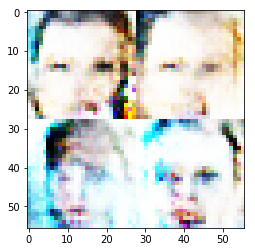

Epoch 1/1... Discriminator Loss: 1.3922... Generator Loss: 0.7255


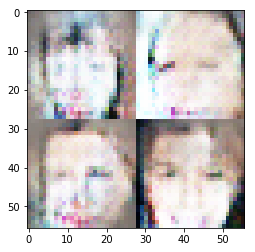

Epoch 1/1... Discriminator Loss: 1.4051... Generator Loss: 0.6133


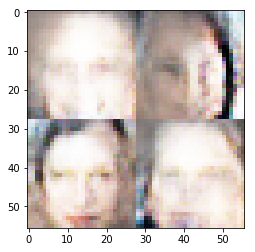

Epoch 1/1... Discriminator Loss: 1.3975... Generator Loss: 0.7068


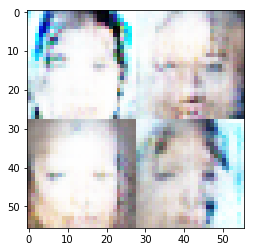

Epoch 1/1... Discriminator Loss: 1.1635... Generator Loss: 0.7321


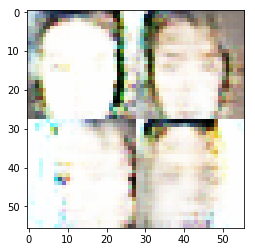

Epoch 1/1... Discriminator Loss: 1.4931... Generator Loss: 0.5174


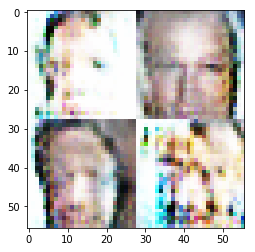

Epoch 1/1... Discriminator Loss: 1.2050... Generator Loss: 0.7447


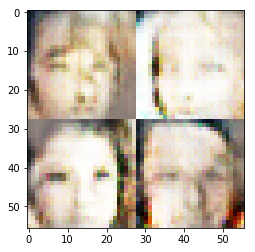

Epoch 1/1... Discriminator Loss: 1.4085... Generator Loss: 0.5487


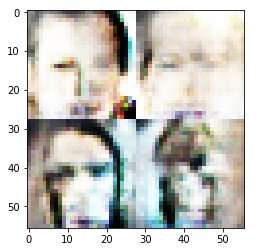

Epoch 1/1... Discriminator Loss: 1.4137... Generator Loss: 0.6142


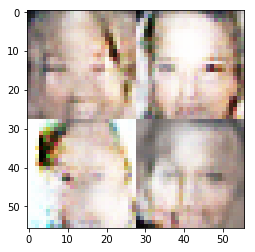

Epoch 1/1... Discriminator Loss: 1.2229... Generator Loss: 0.7055


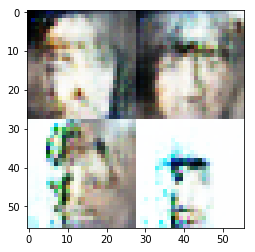

Epoch 1/1... Discriminator Loss: 1.2372... Generator Loss: 0.7882


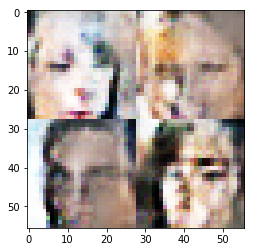

Epoch 1/1... Discriminator Loss: 1.4105... Generator Loss: 0.6122


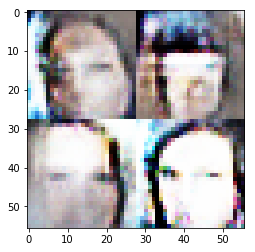

Epoch 1/1... Discriminator Loss: 1.0550... Generator Loss: 0.8867


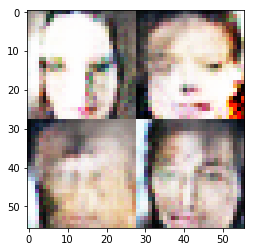

Epoch 1/1... Discriminator Loss: 1.3432... Generator Loss: 0.9205


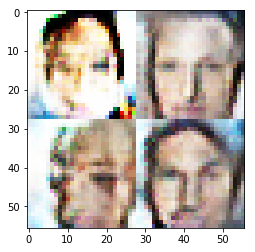

Epoch 1/1... Discriminator Loss: 1.3198... Generator Loss: 0.6186


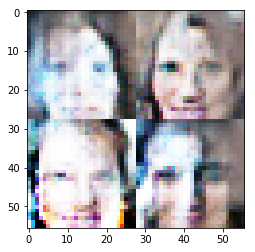

Epoch 1/1... Discriminator Loss: 1.2590... Generator Loss: 0.7046


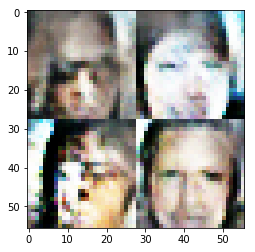

Epoch 1/1... Discriminator Loss: 1.2558... Generator Loss: 0.7749


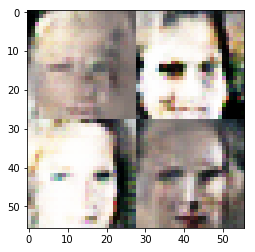

Epoch 1/1... Discriminator Loss: 1.3274... Generator Loss: 0.7026


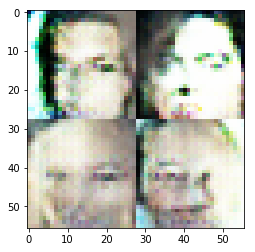

Epoch 1/1... Discriminator Loss: 1.4771... Generator Loss: 0.5503


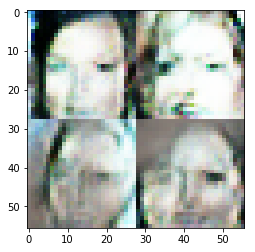

Epoch 1/1... Discriminator Loss: 1.7098... Generator Loss: 0.5087


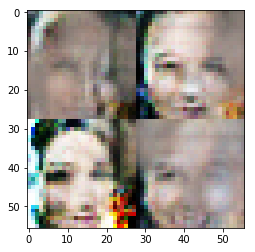

Epoch 1/1... Discriminator Loss: 1.3105... Generator Loss: 0.7002


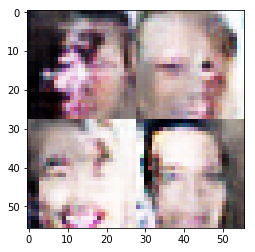

Epoch 1/1... Discriminator Loss: 1.2198... Generator Loss: 0.8077


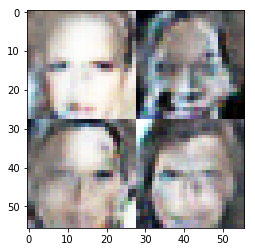

Epoch 1/1... Discriminator Loss: 1.2503... Generator Loss: 0.5985


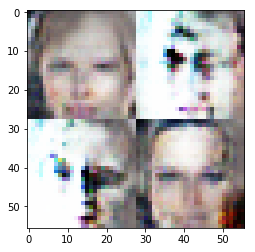

Epoch 1/1... Discriminator Loss: 1.5216... Generator Loss: 0.7386


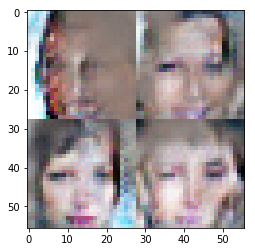

Epoch 1/1... Discriminator Loss: 1.3482... Generator Loss: 0.6894


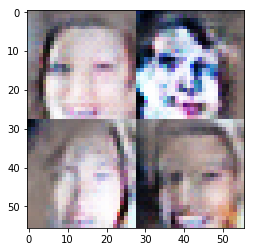

Epoch 1/1... Discriminator Loss: 1.3132... Generator Loss: 0.5887


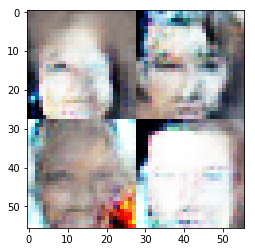

Epoch 1/1... Discriminator Loss: 1.0774... Generator Loss: 0.8991


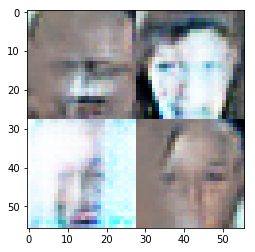

Epoch 1/1... Discriminator Loss: 1.3274... Generator Loss: 0.6366


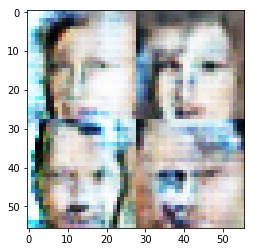

Epoch 1/1... Discriminator Loss: 1.4988... Generator Loss: 0.4910


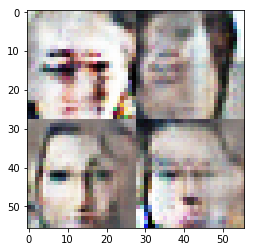

Epoch 1/1... Discriminator Loss: 1.1982... Generator Loss: 0.8400


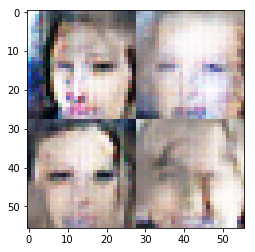

Epoch 1/1... Discriminator Loss: 1.1812... Generator Loss: 0.7307


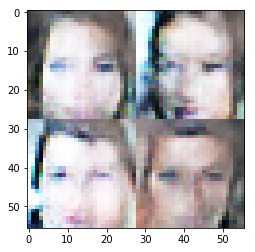

Epoch 1/1... Discriminator Loss: 1.2129... Generator Loss: 0.6750


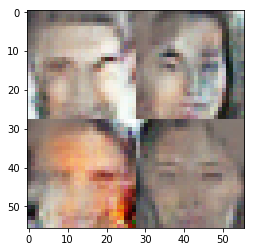

Epoch 1/1... Discriminator Loss: 1.5055... Generator Loss: 0.5893


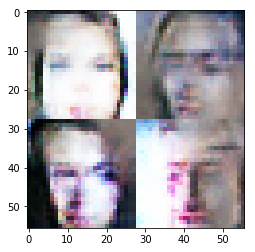

Epoch 1/1... Discriminator Loss: 1.3938... Generator Loss: 0.7116


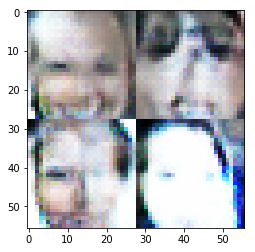

Epoch 1/1... Discriminator Loss: 1.2875... Generator Loss: 0.7408


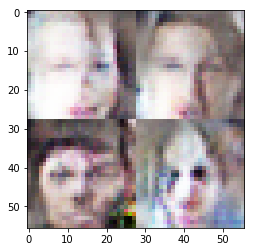

Epoch 1/1... Discriminator Loss: 1.3643... Generator Loss: 0.6073


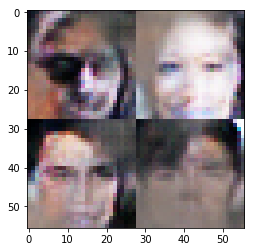

Epoch 1/1... Discriminator Loss: 1.2870... Generator Loss: 0.5791


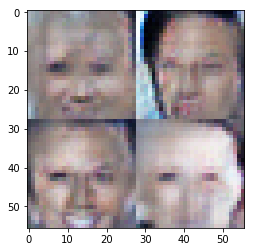

Epoch 1/1... Discriminator Loss: 1.4081... Generator Loss: 0.4733


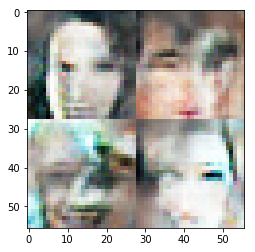

Epoch 1/1... Discriminator Loss: 1.2993... Generator Loss: 1.0001


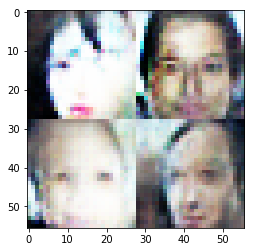

Epoch 1/1... Discriminator Loss: 1.3364... Generator Loss: 0.6397


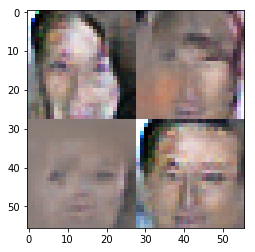

Epoch 1/1... Discriminator Loss: 1.2499... Generator Loss: 0.6855


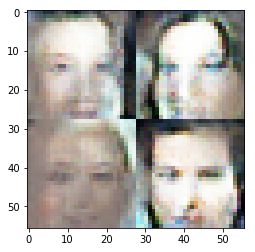

Epoch 1/1... Discriminator Loss: 1.2348... Generator Loss: 0.7490


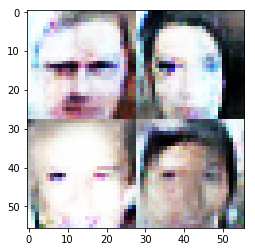

Epoch 1/1... Discriminator Loss: 1.5250... Generator Loss: 0.6034


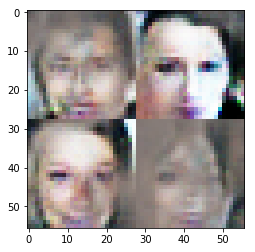

Epoch 1/1... Discriminator Loss: 1.2655... Generator Loss: 0.6737


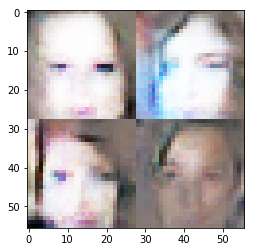

Epoch 1/1... Discriminator Loss: 1.5945... Generator Loss: 0.5627


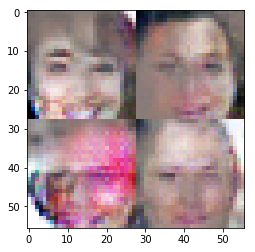

Epoch 1/1... Discriminator Loss: 1.2615... Generator Loss: 0.6929


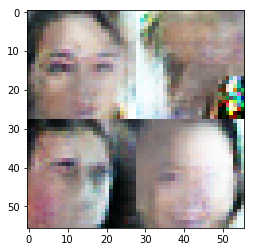

Epoch 1/1... Discriminator Loss: 1.4647... Generator Loss: 0.4387


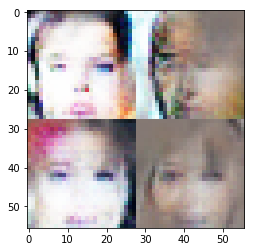

Epoch 1/1... Discriminator Loss: 1.1851... Generator Loss: 0.8493


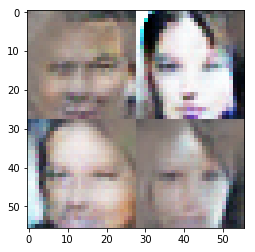

Epoch 1/1... Discriminator Loss: 1.3986... Generator Loss: 0.8144


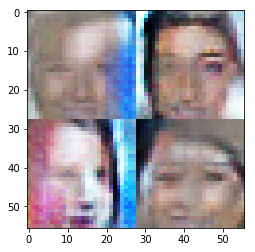

Epoch 1/1... Discriminator Loss: 1.3922... Generator Loss: 0.6597


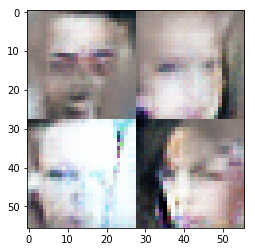

Epoch 1/1... Discriminator Loss: 1.2148... Generator Loss: 0.7078


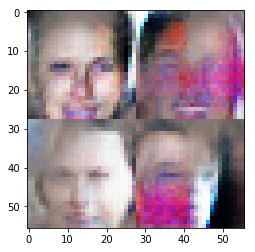

Epoch 1/1... Discriminator Loss: 1.3041... Generator Loss: 0.7494


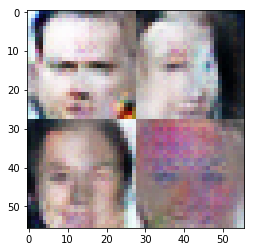

Epoch 1/1... Discriminator Loss: 1.3532... Generator Loss: 0.6225


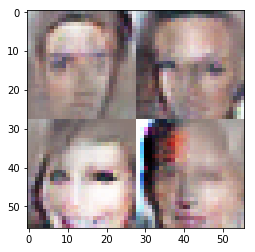

Epoch 1/1... Discriminator Loss: 1.4161... Generator Loss: 0.6740


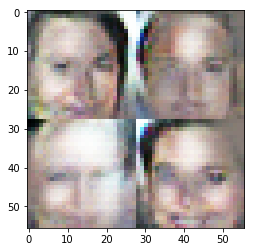

Epoch 1/1... Discriminator Loss: 1.5046... Generator Loss: 0.6025


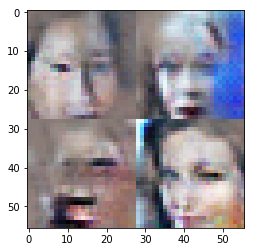

Epoch 1/1... Discriminator Loss: 1.3128... Generator Loss: 0.6997


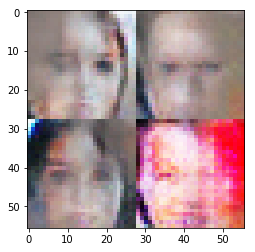

Epoch 1/1... Discriminator Loss: 1.3213... Generator Loss: 0.6229


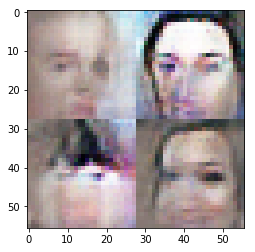

Epoch 1/1... Discriminator Loss: 1.3569... Generator Loss: 0.6237


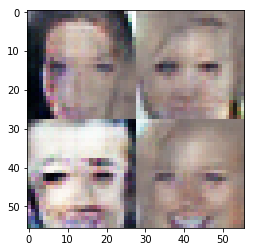

Epoch 1/1... Discriminator Loss: 1.3995... Generator Loss: 0.6665


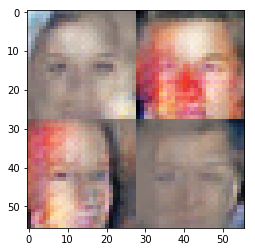

Epoch 1/1... Discriminator Loss: 1.4798... Generator Loss: 0.5765


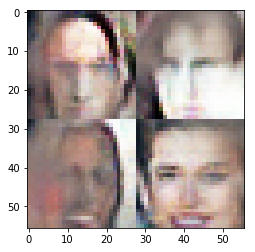

Epoch 1/1... Discriminator Loss: 1.3674... Generator Loss: 0.7324


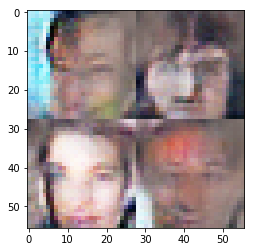

Epoch 1/1... Discriminator Loss: 1.3631... Generator Loss: 0.6055


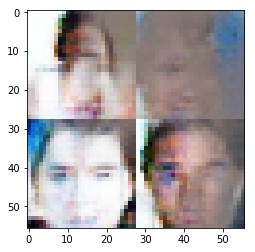

Epoch 1/1... Discriminator Loss: 1.4755... Generator Loss: 0.5553


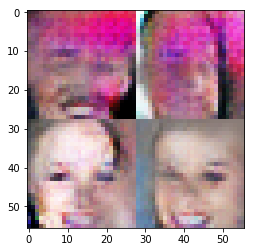

Epoch 1/1... Discriminator Loss: 1.3486... Generator Loss: 0.7235


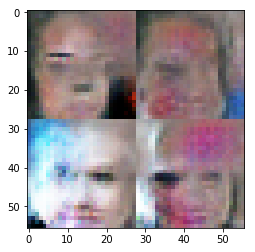

Epoch 1/1... Discriminator Loss: 1.5355... Generator Loss: 0.5539


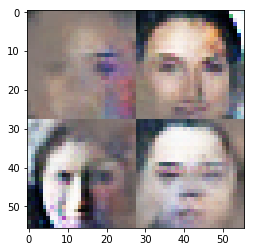

Epoch 1/1... Discriminator Loss: 1.2481... Generator Loss: 0.6812


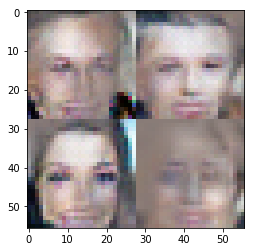

Epoch 1/1... Discriminator Loss: 1.4404... Generator Loss: 0.4887


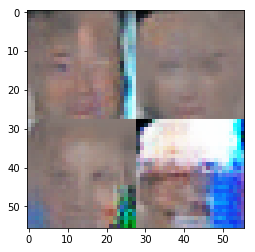

Epoch 1/1... Discriminator Loss: 1.4697... Generator Loss: 0.5836


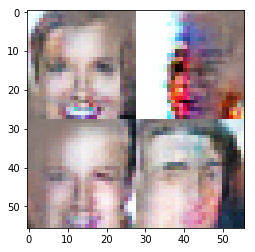

Epoch 1/1... Discriminator Loss: 1.3218... Generator Loss: 0.6096


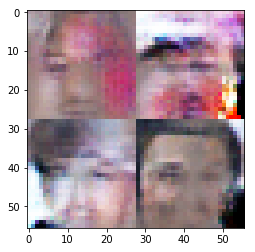

Epoch 1/1... Discriminator Loss: 1.3390... Generator Loss: 0.7008


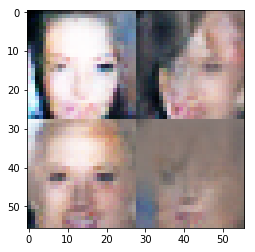

Epoch 1/1... Discriminator Loss: 1.3127... Generator Loss: 0.6557


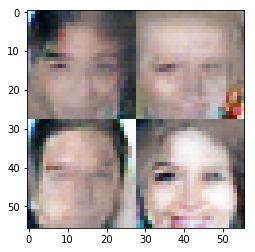

Epoch 1/1... Discriminator Loss: 1.3940... Generator Loss: 0.5927


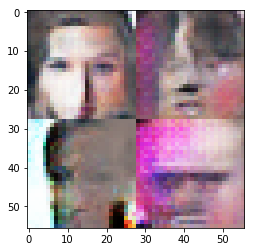

Epoch 1/1... Discriminator Loss: 1.3183... Generator Loss: 0.6120


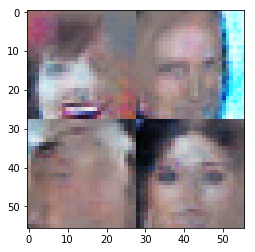

Epoch 1/1... Discriminator Loss: 1.3141... Generator Loss: 0.7317


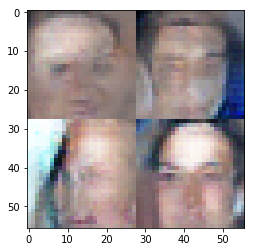

Epoch 1/1... Discriminator Loss: 1.4773... Generator Loss: 0.6735


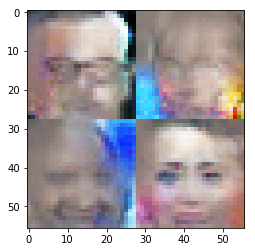

Epoch 1/1... Discriminator Loss: 1.2013... Generator Loss: 0.6559


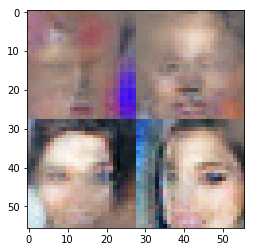

Epoch 1/1... Discriminator Loss: 1.2856... Generator Loss: 0.6600


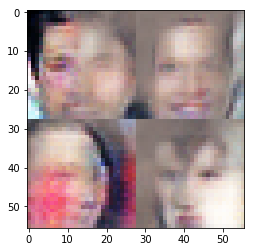

Epoch 1/1... Discriminator Loss: 1.3174... Generator Loss: 0.6276


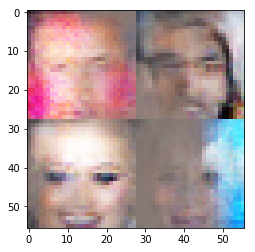

Epoch 1/1... Discriminator Loss: 1.4535... Generator Loss: 0.5974


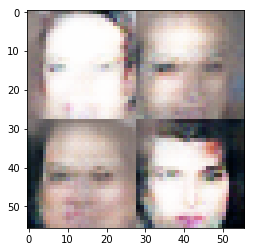

Epoch 1/1... Discriminator Loss: 1.3792... Generator Loss: 0.6006


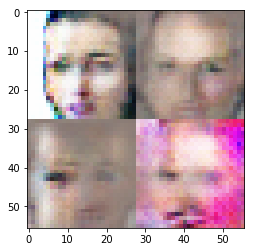

Epoch 1/1... Discriminator Loss: 1.3832... Generator Loss: 0.8109


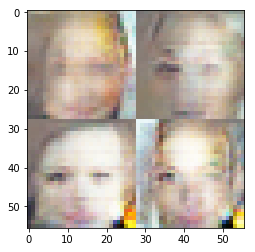

Epoch 1/1... Discriminator Loss: 1.3142... Generator Loss: 0.6684


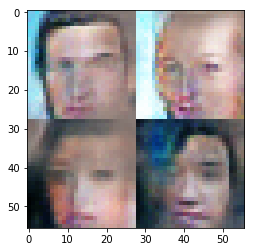

Epoch 1/1... Discriminator Loss: 1.5550... Generator Loss: 0.5008


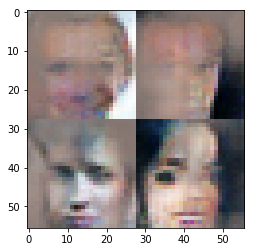

Epoch 1/1... Discriminator Loss: 1.2635... Generator Loss: 0.6463


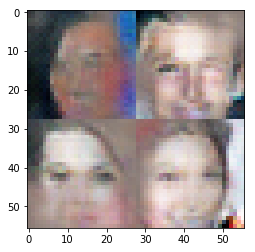

Epoch 1/1... Discriminator Loss: 1.3460... Generator Loss: 0.6922


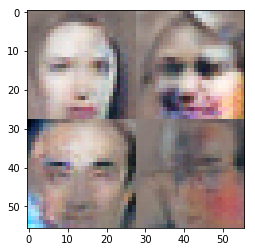

Epoch 1/1... Discriminator Loss: 1.1818... Generator Loss: 0.7414


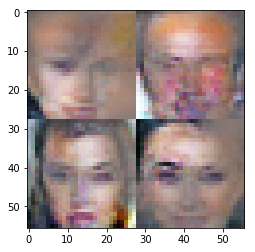

Epoch 1/1... Discriminator Loss: 1.5740... Generator Loss: 0.5006


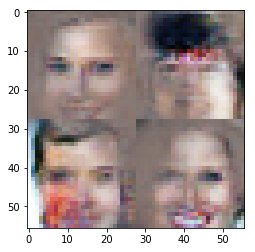

Epoch 1/1... Discriminator Loss: 1.4031... Generator Loss: 0.6925


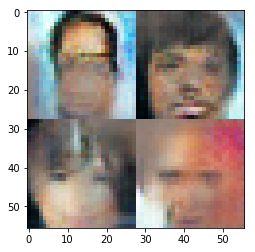

Epoch 1/1... Discriminator Loss: 1.4099... Generator Loss: 0.6119


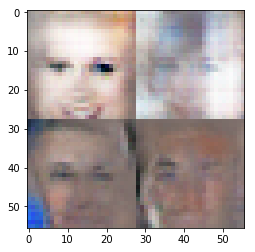

Epoch 1/1... Discriminator Loss: 1.4362... Generator Loss: 0.5901


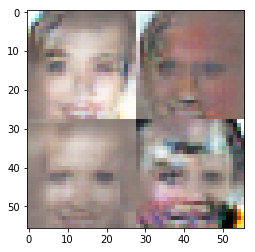

Epoch 1/1... Discriminator Loss: 1.3595... Generator Loss: 0.5620


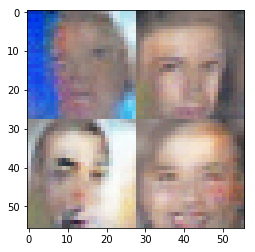

Epoch 1/1... Discriminator Loss: 1.2786... Generator Loss: 0.6666


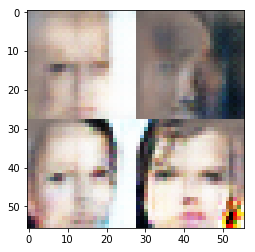

Epoch 1/1... Discriminator Loss: 1.3845... Generator Loss: 0.6731


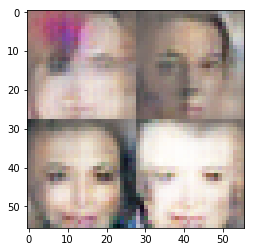

Epoch 1/1... Discriminator Loss: 1.2299... Generator Loss: 0.7992


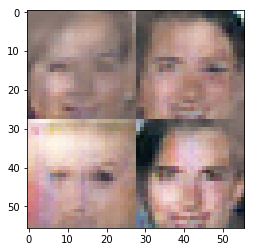

Epoch 1/1... Discriminator Loss: 1.5848... Generator Loss: 0.7219


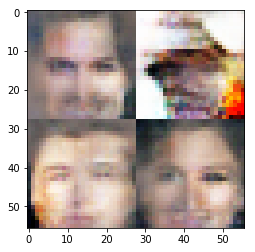

Epoch 1/1... Discriminator Loss: 1.2886... Generator Loss: 0.6666


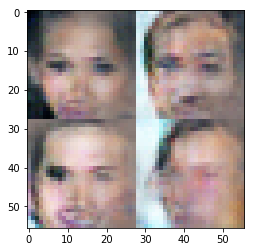

Epoch 1/1... Discriminator Loss: 1.4121... Generator Loss: 0.5912


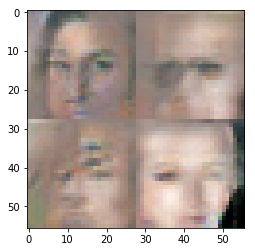

Epoch 1/1... Discriminator Loss: 1.4013... Generator Loss: 0.6308


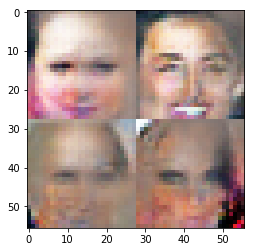

Epoch 1/1... Discriminator Loss: 1.2767... Generator Loss: 0.6386


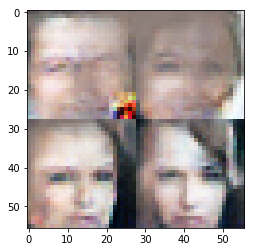

Epoch 1/1... Discriminator Loss: 1.3424... Generator Loss: 0.6219


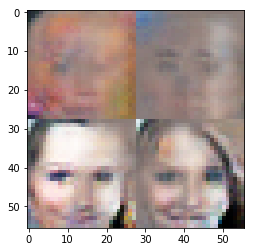

Epoch 1/1... Discriminator Loss: 1.2901... Generator Loss: 0.6354


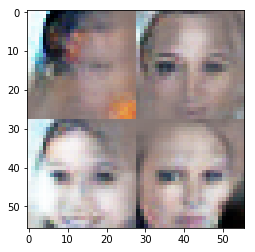

Epoch 1/1... Discriminator Loss: 1.5105... Generator Loss: 0.5979


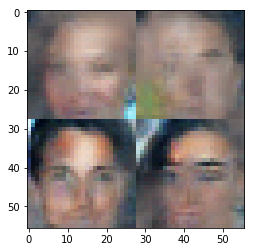

Epoch 1/1... Discriminator Loss: 1.4594... Generator Loss: 0.6376


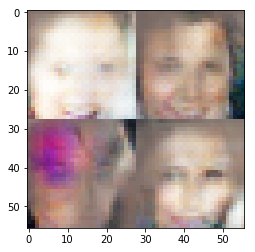

Epoch 1/1... Discriminator Loss: 1.3419... Generator Loss: 0.6720


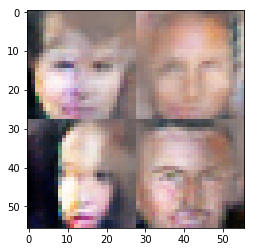

Epoch 1/1... Discriminator Loss: 1.2911... Generator Loss: 0.6273


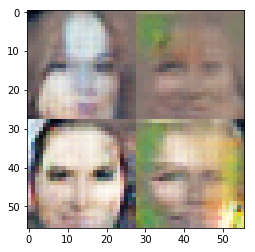

Epoch 1/1... Discriminator Loss: 1.3824... Generator Loss: 0.6657


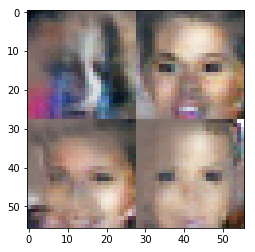

Epoch 1/1... Discriminator Loss: 1.4743... Generator Loss: 0.6564


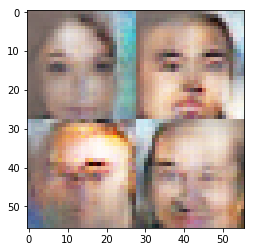

Epoch 1/1... Discriminator Loss: 1.2991... Generator Loss: 0.6150


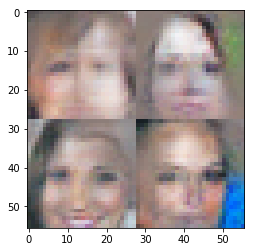

Epoch 1/1... Discriminator Loss: 1.4819... Generator Loss: 0.5470


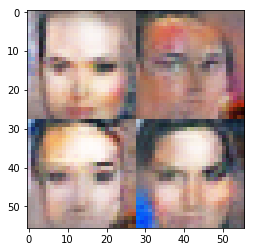

In [40]:
batch_size = 64
z_dim = 100
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.